# Predict #
To be re-inserted into main Jupyter Notebook after.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For neural networks.
import keras as kr
# For data frames.
import pandas as pd
# For numerical arrays.
import numpy as np
# For preprocessing data.
import sklearn.preprocessing as pre
# For splitting data sets.
import sklearn.model_selection as mod
# For whitening.
import sklearn.decomposition as dec
# to write to csv file
import csv

Using TensorFlow backend.


In [2]:
# Import sklearn for comparison too
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [3]:
# Load the dataset into a dataframe
data = pd.DataFrame(data = load_boston().data, columns= load_boston().feature_names)
# Add the house price
data["MEDV"] = load_boston().target
# Quick check that all is ok
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


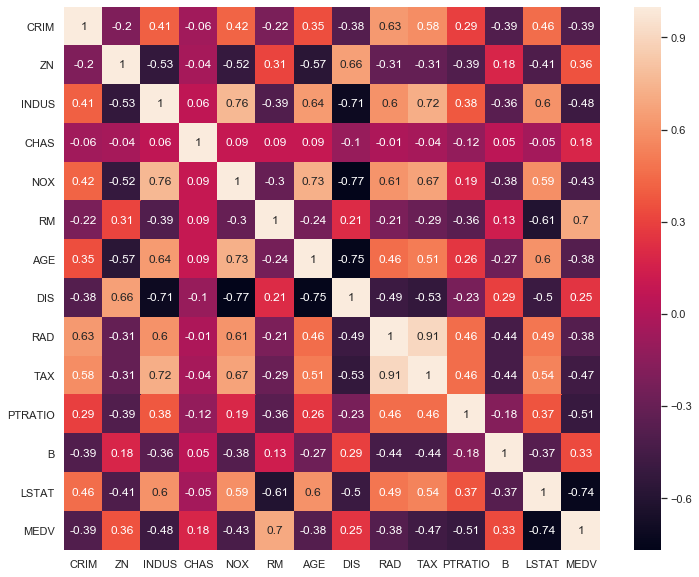

In [4]:
sns.set(rc={'figure.figsize':(12,10)})
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [5]:
correlation_matrix["MEDV"]

CRIM      -0.39
ZN         0.36
INDUS     -0.48
CHAS       0.18
NOX       -0.43
RM         0.70
AGE       -0.38
DIS        0.25
RAD       -0.38
TAX       -0.47
PTRATIO   -0.51
B          0.33
LSTAT     -0.74
MEDV       1.00
Name: MEDV, dtype: float64

In [6]:
cm = correlation_matrix.transform(func= lambda x: abs(x))["MEDV"].sort_values(ascending=False)
cm = cm.drop("MEDV",axis=0)
cm

LSTAT      0.74
RM         0.70
PTRATIO    0.51
INDUS      0.48
TAX        0.47
NOX        0.43
CRIM       0.39
RAD        0.38
AGE        0.38
ZN         0.36
B          0.33
DIS        0.25
CHAS       0.18
Name: MEDV, dtype: float64

Because the TAX and RAD parameters are highly correlated (0.91) both should not be  used in training any model. As TAX has a higher correlation than RAD, the RAD feature will be dropped.

In [7]:
cm = cm.drop("RAD",axis=0)
cm

LSTAT      0.74
RM         0.70
PTRATIO    0.51
INDUS      0.48
TAX        0.47
NOX        0.43
CRIM       0.39
AGE        0.38
ZN         0.36
B          0.33
DIS        0.25
CHAS       0.18
Name: MEDV, dtype: float64

In [8]:
# Putting all possible parameters in a list in order of correlation
params = []
for i in range(0, len(cm)):
    params.append(cm.index[i])

In [9]:
y = data['MEDV'] # outputs

def getInputs(noPar):
    # Split the dataset into what we are using
    return data[params[:noPar]] # inputs

In [10]:
def scaleDS(inputs):
    # Adding a scaler
    scaler = pre.StandardScaler()
    scaler.fit(inputs)
    return scaler.transform(inputs)

In [11]:
def splitDS(inputs):
    global x_train, x_test, y_train, y_test
    # Split the dataset into training and testing
    x_train, x_test, y_train, y_test = mod.train_test_split(inputs, y, test_size=testSize)

In [12]:
def createModel(actType, optType):
    global noParams, noEpoch, batchSize
    # Create our model
    m = kr.models.Sequential()
    m.add(kr.layers.Dense(20, input_dim=noParams, activation = actType))
    m.add(kr.layers.Dense(1, activation="linear"))
    m.compile(loss = "mean_squared_error", optimizer =optType)
    # Train the network
    m.fit(x_train, y_train, epochs=noEpoch, batch_size=batchSize)
    return m

In [13]:
def doModel(model, epo, bs):
    global x_trian, x_test, y_tran, y_test, batchSize
    # Train the network
    model.fit(x_train, y_train, epochs=epo, batch_size=bs)
    # Calculate the loss function (Mean squared error in our case)
    return model.evaluate(x_test, y_test)

In [14]:
# Headings for the data
results= []

In [31]:
# Parameterise everything

# Do you want to create and test all the models? 
# If yes, set the following to true, if no, leave at false and data from previous run will be read into dataframe
yesCreateModels = True

# No of variables to include in predictions
noParams = 4 

# Test / Train Split
testSize = 0.3

# All the activations
acts = ["relu", "tanh", "sigmoid", "exponential", "elu", "linear"]
#act = acts[5]

# Optimisers
opts= ["sgd", "adam", "nadam"]
opt = opts[0]

# model trial settings
noEpoch= 100
batchSize = 10

# Whether the data should be scaled or not
scaling = True

if yesCreateModels == True:
    # Check for increasing no of attributes and all activations
    for act in acts:
        for noParams in range(1,12):
            # Create your inputs
            x = getInputs(noParams)
            # Scale if it is called for
            if scaling  == True:
                x_scaled = scaleDS(x)
            else:
                x_scaled = x
            # Split into training and testing data
            splitDS(x_scaled)
            # Create the model based on the paramters supplied
            m = createModel(act, opt)
            # Append the settings and final loss results after fitting and evaluating the model to the results file
            results.append([noParams, scaling, testSize, act, opt, noEpoch, batchSize, doModel(m, noEpoch, batchSize)])

Epoch 1/100
354/354 [==============================] - 0s 310us/step - loss: 97.7946
Epoch 2/100
354/354 [==============================] - 0s 79us/step - loss: 33.9647
Epoch 3/100
354/354 [==============================] - 0s 96us/step - loss: 32.8871
Epoch 4/100
354/354 [==============================] - 0s 70us/step - loss: 37.6394
Epoch 5/100
354/354 [==============================] - 0s 65us/step - loss: 34.6366
Epoch 6/100
354/354 [==============================] - 0s 70us/step - loss: 32.4705
Epoch 7/100
354/354 [==============================] - 0s 68us/step - loss: 37.2870
Epoch 8/100
354/354 [==============================] - 0s 56us/step - loss: 33.1420
Epoch 9/100
354/354 [==============================] - 0s 73us/step - loss: 35.1944
Epoch 10/100
354/354 [==============================] - 0s 59us/step - loss: 32.6530
Epoch 11/100
354/354 [==============================] - 0s 68us/step - loss: 35.8878
Epoch 12/100
354/354 [==============================] - 0s 59us/step - lo

354/354 [==============================] - 0s 54us/step - loss: 31.1008
Epoch 98/100
354/354 [==============================] - 0s 59us/step - loss: 31.4402
Epoch 99/100
354/354 [==============================] - 0s 56us/step - loss: 30.6523
Epoch 100/100
354/354 [==============================] - 0s 54us/step - loss: 28.4448
Epoch 1/100
354/354 [==============================] - 0s 54us/step - loss: 29.6172
Epoch 2/100
354/354 [==============================] - 0s 56us/step - loss: 31.6831
Epoch 3/100
354/354 [==============================] - 0s 51us/step - loss: 31.2429
Epoch 4/100
354/354 [==============================] - 0s 53us/step - loss: 30.5775
Epoch 5/100
354/354 [==============================] - 0s 54us/step - loss: 30.5296
Epoch 6/100
354/354 [==============================] - 0s 56us/step - loss: 31.4989
Epoch 7/100
354/354 [==============================] - 0s 61us/step - loss: 29.2218
Epoch 8/100
354/354 [==============================] - 0s 56us/step - loss: 32.6177


354/354 [==============================] - 0s 54us/step - loss: 29.7024
Epoch 94/100
354/354 [==============================] - 0s 58us/step - loss: 29.7030
Epoch 95/100
354/354 [==============================] - 0s 56us/step - loss: 29.6697
Epoch 96/100
354/354 [==============================] - 0s 56us/step - loss: 29.1541
Epoch 97/100
354/354 [==============================] - 0s 54us/step - loss: 28.1208
Epoch 98/100
354/354 [==============================] - 0s 68us/step - loss: 29.3044
Epoch 99/100
354/354 [==============================] - 0s 56us/step - loss: 28.3142
Epoch 100/100
152/152 [==============================] - 0s 144us/step
Epoch 1/100
354/354 [==============================] - 0s 296us/step - loss: 91.5485
Epoch 2/100
354/354 [==============================] - 0s 54us/step - loss: 22.1729
Epoch 3/100
354/354 [==============================] - 0s 54us/step - loss: 20.4819
Epoch 4/100
354/354 [==============================] - 0s 56us/step - loss: 21.1279
Epoch 5/10

Epoch 89/100
354/354 [==============================] - 0s 59us/step - loss: 18.8895
Epoch 90/100
354/354 [==============================] - 0s 56us/step - loss: 19.4767
Epoch 91/100
354/354 [==============================] - 0s 56us/step - loss: 19.1537
Epoch 92/100
354/354 [==============================] - 0s 59us/step - loss: 19.6856
Epoch 93/100
354/354 [==============================] - 0s 56us/step - loss: 16.5153
Epoch 94/100
354/354 [==============================] - 0s 62us/step - loss: 17.5629
Epoch 95/100
354/354 [==============================] - 0s 70us/step - loss: 17.3669
Epoch 96/100
354/354 [==============================] - 0s 68us/step - loss: 18.0485
Epoch 97/100
354/354 [==============================] - 0s 59us/step - loss: 18.4826
Epoch 98/100
354/354 [==============================] - 0s 56us/step - loss: 18.3515
Epoch 99/100
354/354 [==============================] - 0s 65us/step - loss: 16.5557
Epoch 100/100
354/354 [==============================] - 0s 62us/

354/354 [==============================] - 0s 56us/step - loss: 17.5647
Epoch 86/100
354/354 [==============================] - 0s 56us/step - loss: 16.7520
Epoch 87/100
354/354 [==============================] - 0s 56us/step - loss: 17.3303
Epoch 88/100
354/354 [==============================] - 0s 59us/step - loss: 14.3949
Epoch 89/100
354/354 [==============================] - 0s 56us/step - loss: 19.5789
Epoch 90/100
354/354 [==============================] - 0s 59us/step - loss: 16.1240
Epoch 91/100
354/354 [==============================] - 0s 59us/step - loss: 15.5909
Epoch 92/100
354/354 [==============================] - 0s 59us/step - loss: 16.1599
Epoch 93/100
354/354 [==============================] - 0s 59us/step - loss: 15.4732
Epoch 94/100
354/354 [==============================] - 0s 56us/step - loss: 16.1866
Epoch 95/100
354/354 [==============================] - 0s 68us/step - loss: 17.3618
Epoch 96/100
354/354 [==============================] - 0s 62us/step - loss: 1

Epoch 81/100
354/354 [==============================] - 0s 65us/step - loss: 10.9707
Epoch 82/100
354/354 [==============================] - 0s 56us/step - loss: 10.4055
Epoch 83/100
354/354 [==============================] - 0s 54us/step - loss: 11.0410
Epoch 84/100
354/354 [==============================] - 0s 56us/step - loss: 10.8021
Epoch 85/100
354/354 [==============================] - 0s 59us/step - loss: 11.3545
Epoch 86/100
354/354 [==============================] - 0s 68us/step - loss: 11.1432
Epoch 87/100
354/354 [==============================] - 0s 62us/step - loss: 10.8489
Epoch 88/100
354/354 [==============================] - 0s 70us/step - loss: 9.8158
Epoch 89/100
354/354 [==============================] - 0s 54us/step - loss: 10.7739
Epoch 90/100
354/354 [==============================] - 0s 62us/step - loss: 11.4684
Epoch 91/100
354/354 [==============================] - 0s 71us/step - loss: 12.0965
Epoch 92/100
354/354 [==============================] - 0s 59us/st

354/354 [==============================] - 0s 53us/step - loss: 11.0804
Epoch 78/100
354/354 [==============================] - 0s 56us/step - loss: 10.2684
Epoch 79/100
354/354 [==============================] - 0s 56us/step - loss: 9.6506
Epoch 80/100
354/354 [==============================] - 0s 68us/step - loss: 9.3436
Epoch 81/100
354/354 [==============================] - 0s 56us/step - loss: 10.6006
Epoch 82/100
354/354 [==============================] - 0s 73us/step - loss: 9.6766
Epoch 83/100
354/354 [==============================] - 0s 59us/step - loss: 11.2825
Epoch 84/100
354/354 [==============================] - 0s 62us/step - loss: 9.7880
Epoch 85/100
354/354 [==============================] - 0s 62us/step - loss: 10.1823
Epoch 86/100
354/354 [==============================] - 0s 54us/step - loss: 11.2836
Epoch 87/100
354/354 [==============================] - 0s 62us/step - loss: 9.7076
Epoch 88/100
354/354 [==============================] - 0s 59us/step - loss: 9.7622

354/354 [==============================] - 0s 62us/step - loss: 12.6088
Epoch 73/100
354/354 [==============================] - 0s 62us/step - loss: 12.4175
Epoch 74/100
354/354 [==============================] - 0s 59us/step - loss: 14.9116
Epoch 75/100
354/354 [==============================] - 0s 59us/step - loss: 11.7035
Epoch 76/100
354/354 [==============================] - 0s 65us/step - loss: 12.8392
Epoch 77/100
354/354 [==============================] - 0s 59us/step - loss: 11.9544
Epoch 78/100
354/354 [==============================] - 0s 56us/step - loss: 15.1402
Epoch 79/100
354/354 [==============================] - 0s 73us/step - loss: 13.5591
Epoch 80/100
354/354 [==============================] - 0s 62us/step - loss: 12.2103
Epoch 81/100
354/354 [==============================] - 0s 70us/step - loss: 12.9597
Epoch 82/100
354/354 [==============================] - 0s 59us/step - loss: 13.6475
Epoch 83/100
354/354 [==============================] - 0s 70us/step - loss: 1

354/354 [==============================] - 0s 70us/step - loss: 12.1816
Epoch 69/100
354/354 [==============================] - 0s 79us/step - loss: 15.9294
Epoch 70/100
354/354 [==============================] - 0s 59us/step - loss: 11.6202
Epoch 71/100
354/354 [==============================] - 0s 56us/step - loss: 11.4015
Epoch 72/100
354/354 [==============================] - 0s 65us/step - loss: 11.9471
Epoch 73/100
354/354 [==============================] - 0s 73us/step - loss: 12.0278
Epoch 74/100
354/354 [==============================] - 0s 62us/step - loss: 11.4388
Epoch 75/100
354/354 [==============================] - 0s 56us/step - loss: 12.7338
Epoch 76/100
354/354 [==============================] - 0s 54us/step - loss: 12.0339
Epoch 77/100
354/354 [==============================] - 0s 56us/step - loss: 11.2615
Epoch 78/100
354/354 [==============================] - 0s 59us/step - loss: 12.2982
Epoch 79/100
354/354 [==============================] - 0s 56us/step - loss: 1

Epoch 64/100
354/354 [==============================] - 0s 54us/step - loss: 15.7189
Epoch 65/100
354/354 [==============================] - 0s 65us/step - loss: 13.6787
Epoch 66/100
354/354 [==============================] - 0s 59us/step - loss: 13.8293
Epoch 67/100
354/354 [==============================] - 0s 56us/step - loss: 13.8004
Epoch 68/100
354/354 [==============================] - 0s 56us/step - loss: 13.0265
Epoch 69/100
354/354 [==============================] - 0s 59us/step - loss: 13.6331
Epoch 70/100
354/354 [==============================] - 0s 56us/step - loss: 14.3338
Epoch 71/100
354/354 [==============================] - 0s 59us/step - loss: 14.2377
Epoch 72/100
354/354 [==============================] - 0s 59us/step - loss: 13.7023
Epoch 73/100
354/354 [==============================] - 0s 59us/step - loss: 12.9207
Epoch 74/100
354/354 [==============================] - 0s 59us/step - loss: 14.3870
Epoch 75/100
354/354 [==============================] - 0s 59us/s

354/354 [==============================] - 0s 62us/step - loss: 12.8858
Epoch 61/100
354/354 [==============================] - 0s 68us/step - loss: 12.7814
Epoch 62/100
354/354 [==============================] - 0s 62us/step - loss: 13.0954
Epoch 63/100
354/354 [==============================] - 0s 56us/step - loss: 12.6380
Epoch 64/100
354/354 [==============================] - 0s 56us/step - loss: 12.7090
Epoch 65/100
354/354 [==============================] - 0s 62us/step - loss: 13.0685
Epoch 66/100
354/354 [==============================] - 0s 53us/step - loss: 13.2099
Epoch 67/100
354/354 [==============================] - 0s 56us/step - loss: 11.5001
Epoch 68/100
354/354 [==============================] - 0s 56us/step - loss: 12.9173
Epoch 69/100
354/354 [==============================] - 0s 56us/step - loss: 12.7113
Epoch 70/100
354/354 [==============================] - 0s 59us/step - loss: 13.4221
Epoch 71/100
354/354 [==============================] - 0s 56us/step - loss: 1

354/354 [==============================] - 0s 56us/step - loss: 11.3895
Epoch 56/100
354/354 [==============================] - 0s 59us/step - loss: 12.3921
Epoch 57/100
354/354 [==============================] - 0s 56us/step - loss: 10.8614
Epoch 58/100
354/354 [==============================] - 0s 56us/step - loss: 10.0583
Epoch 59/100
354/354 [==============================] - 0s 53us/step - loss: 10.0751
Epoch 60/100
354/354 [==============================] - 0s 54us/step - loss: 10.3323
Epoch 61/100
354/354 [==============================] - 0s 59us/step - loss: 11.2985
Epoch 62/100
354/354 [==============================] - 0s 56us/step - loss: 11.1508
Epoch 63/100
354/354 [==============================] - 0s 56us/step - loss: 12.7079
Epoch 64/100
354/354 [==============================] - 0s 56us/step - loss: 11.1847
Epoch 65/100
354/354 [==============================] - 0s 59us/step - loss: 11.5255
Epoch 66/100
354/354 [==============================] - 0s 53us/step - loss: 1

354/354 [==============================] - 0s 54us/step - loss: 8.9618
Epoch 53/100
354/354 [==============================] - 0s 59us/step - loss: 9.2634
Epoch 54/100
354/354 [==============================] - 0s 53us/step - loss: 9.2477
Epoch 55/100
354/354 [==============================] - 0s 52us/step - loss: 9.4395
Epoch 56/100
354/354 [==============================] - 0s 56us/step - loss: 9.7143
Epoch 57/100
354/354 [==============================] - 0s 59us/step - loss: 9.1902
Epoch 58/100
354/354 [==============================] - 0s 59us/step - loss: 8.9465
Epoch 59/100
354/354 [==============================] - 0s 54us/step - loss: 9.8354
Epoch 60/100
354/354 [==============================] - 0s 58us/step - loss: 9.8506
Epoch 61/100
354/354 [==============================] - 0s 68us/step - loss: 10.2685
Epoch 62/100
354/354 [==============================] - 0s 53us/step - loss: 8.9106
Epoch 63/100
354/354 [==============================] - 0s 56us/step - loss: 9.7335
Epoc

354/354 [==============================] - 0s 56us/step - loss: 10.9166
Epoch 49/100
354/354 [==============================] - 0s 59us/step - loss: 9.1922
Epoch 50/100
354/354 [==============================] - 0s 53us/step - loss: 11.7987
Epoch 51/100
354/354 [==============================] - 0s 56us/step - loss: 10.7316
Epoch 52/100
354/354 [==============================] - 0s 56us/step - loss: 10.6420
Epoch 53/100
354/354 [==============================] - 0s 59us/step - loss: 11.4454
Epoch 54/100
354/354 [==============================] - 0s 51us/step - loss: 11.5848
Epoch 55/100
354/354 [==============================] - 0s 53us/step - loss: 9.1547
Epoch 56/100
354/354 [==============================] - 0s 56us/step - loss: 10.1534
Epoch 57/100
354/354 [==============================] - 0s 59us/step - loss: 11.2199
Epoch 58/100
354/354 [==============================] - 0s 59us/step - loss: 9.7062
Epoch 59/100
354/354 [==============================] - 0s 54us/step - loss: 9.80

354/354 [==============================] - 0s 59us/step - loss: 7.3176
Epoch 46/100
354/354 [==============================] - 0s 59us/step - loss: 8.2819
Epoch 47/100
354/354 [==============================] - 0s 57us/step - loss: 9.0953
Epoch 48/100
354/354 [==============================] - 0s 56us/step - loss: 8.9792
Epoch 49/100
354/354 [==============================] - 0s 62us/step - loss: 7.8864
Epoch 50/100
354/354 [==============================] - 0s 56us/step - loss: 8.2123
Epoch 51/100
354/354 [==============================] - 0s 54us/step - loss: 7.0091
Epoch 52/100
354/354 [==============================] - 0s 56us/step - loss: 10.6002
Epoch 53/100
354/354 [==============================] - 0s 59us/step - loss: 7.8354
Epoch 54/100
354/354 [==============================] - 0s 54us/step - loss: 7.3578
Epoch 55/100
354/354 [==============================] - 0s 54us/step - loss: 8.2690
Epoch 56/100
354/354 [==============================] - 0s 56us/step - loss: 8.3367
Epoc

354/354 [==============================] - 0s 56us/step - loss: 9.9564
Epoch 42/100
354/354 [==============================] - 0s 65us/step - loss: 9.7651
Epoch 43/100
354/354 [==============================] - 0s 62us/step - loss: 10.4447
Epoch 44/100
354/354 [==============================] - 0s 62us/step - loss: 9.3902
Epoch 45/100
354/354 [==============================] - 0s 62us/step - loss: 9.7572
Epoch 46/100
354/354 [==============================] - 0s 62us/step - loss: 11.2824
Epoch 47/100
354/354 [==============================] - 0s 62us/step - loss: 9.8267
Epoch 48/100
354/354 [==============================] - 0s 62us/step - loss: 9.0242
Epoch 49/100
354/354 [==============================] - 0s 59us/step - loss: 10.4493
Epoch 50/100
354/354 [==============================] - 0s 68us/step - loss: 9.8398
Epoch 51/100
354/354 [==============================] - 0s 56us/step - loss: 10.0542
Epoch 52/100
354/354 [==============================] - 0s 59us/step - loss: 8.9635
E

354/354 [==============================] - 0s 56us/step - loss: 6.8455
Epoch 39/100
354/354 [==============================] - 0s 59us/step - loss: 8.2797
Epoch 40/100
354/354 [==============================] - 0s 59us/step - loss: 6.9601
Epoch 41/100
354/354 [==============================] - 0s 70us/step - loss: 8.0389
Epoch 42/100
354/354 [==============================] - 0s 56us/step - loss: 11.2408
Epoch 43/100
354/354 [==============================] - 0s 59us/step - loss: 7.5903
Epoch 44/100
354/354 [==============================] - 0s 56us/step - loss: 7.7570
Epoch 45/100
354/354 [==============================] - 0s 59us/step - loss: 7.4810
Epoch 46/100
354/354 [==============================] - 0s 56us/step - loss: 7.3257
Epoch 47/100
354/354 [==============================] - 0s 56us/step - loss: 7.2700
Epoch 48/100
354/354 [==============================] - 0s 59us/step - loss: 8.6661
Epoch 49/100
354/354 [==============================] - 0s 62us/step - loss: 7.1599
Epoc

354/354 [==============================] - 0s 62us/step - loss: 10.4152
Epoch 35/100
354/354 [==============================] - 0s 65us/step - loss: 12.1837
Epoch 36/100
354/354 [==============================] - 0s 59us/step - loss: 10.1505
Epoch 37/100
354/354 [==============================] - 0s 62us/step - loss: 11.7480
Epoch 38/100
354/354 [==============================] - 0s 62us/step - loss: 11.2860
Epoch 39/100
354/354 [==============================] - 0s 59us/step - loss: 11.4548
Epoch 40/100
354/354 [==============================] - 0s 62us/step - loss: 11.9607
Epoch 41/100
354/354 [==============================] - 0s 62us/step - loss: 10.3275
Epoch 42/100
354/354 [==============================] - 0s 62us/step - loss: 10.8006
Epoch 43/100
354/354 [==============================] - 0s 65us/step - loss: 10.3280
Epoch 44/100
354/354 [==============================] - 0s 65us/step - loss: 11.6233
Epoch 45/100
354/354 [==============================] - 0s 62us/step - loss: 1

354/354 [==============================] - 0s 59us/step - loss: 7.7990
Epoch 32/100
354/354 [==============================] - 0s 59us/step - loss: 7.8270
Epoch 33/100
354/354 [==============================] - 0s 64us/step - loss: 8.7729
Epoch 34/100
354/354 [==============================] - 0s 59us/step - loss: 7.6263
Epoch 35/100
354/354 [==============================] - 0s 59us/step - loss: 7.8526
Epoch 36/100
354/354 [==============================] - 0s 62us/step - loss: 7.1660
Epoch 37/100
354/354 [==============================] - 0s 59us/step - loss: 7.1691
Epoch 38/100
354/354 [==============================] - 0s 59us/step - loss: 8.2389
Epoch 39/100
354/354 [==============================] - 0s 59us/step - loss: 7.1503
Epoch 40/100
354/354 [==============================] - 0s 59us/step - loss: 7.9480
Epoch 41/100
354/354 [==============================] - 0s 62us/step - loss: 8.2317
Epoch 42/100
354/354 [==============================] - 0s 59us/step - loss: 6.8898
Epoch

354/354 [==============================] - 0s 65us/step - loss: 13.1922
Epoch 28/100
354/354 [==============================] - 0s 68us/step - loss: 13.9624
Epoch 29/100
354/354 [==============================] - 0s 56us/step - loss: 13.0487
Epoch 30/100
354/354 [==============================] - 0s 56us/step - loss: 12.2454
Epoch 31/100
354/354 [==============================] - 0s 59us/step - loss: 10.6085
Epoch 32/100
354/354 [==============================] - 0s 65us/step - loss: 12.0232
Epoch 33/100
354/354 [==============================] - 0s 56us/step - loss: 11.8525
Epoch 34/100
354/354 [==============================] - 0s 68us/step - loss: 14.4518
Epoch 35/100
354/354 [==============================] - 0s 67us/step - loss: 12.0143
Epoch 36/100
354/354 [==============================] - 0s 59us/step - loss: 14.9148
Epoch 37/100
354/354 [==============================] - 0s 62us/step - loss: 11.2230
Epoch 38/100
354/354 [==============================] - 0s 59us/step - loss: 1

354/354 [==============================] - 0s 62us/step - loss: 10.2991
Epoch 24/100
354/354 [==============================] - 0s 70us/step - loss: 9.2048
Epoch 25/100
354/354 [==============================] - 0s 59us/step - loss: 8.3658
Epoch 26/100
354/354 [==============================] - 0s 62us/step - loss: 8.8610
Epoch 27/100
354/354 [==============================] - 0s 62us/step - loss: 8.5817
Epoch 28/100
354/354 [==============================] - 0s 59us/step - loss: 9.9026
Epoch 29/100
354/354 [==============================] - 0s 62us/step - loss: 10.3590
Epoch 30/100
354/354 [==============================] - 0s 62us/step - loss: 9.2107
Epoch 31/100
354/354 [==============================] - 0s 62us/step - loss: 8.4224
Epoch 32/100
354/354 [==============================] - 0s 59us/step - loss: 8.9138
Epoch 33/100
354/354 [==============================] - 0s 59us/step - loss: 8.5830
Epoch 34/100
354/354 [==============================] - 0s 59us/step - loss: 7.9477
Epo

354/354 [==============================] - 0s 68us/step - loss: 12.6521
Epoch 20/100
354/354 [==============================] - 0s 62us/step - loss: 12.6332
Epoch 21/100
354/354 [==============================] - 0s 65us/step - loss: 13.1336
Epoch 22/100
354/354 [==============================] - 0s 59us/step - loss: 12.1111
Epoch 23/100
354/354 [==============================] - 0s 62us/step - loss: 13.2801
Epoch 24/100
354/354 [==============================] - 0s 59us/step - loss: 11.5241
Epoch 25/100
354/354 [==============================] - 0s 65us/step - loss: 11.1831
Epoch 26/100
354/354 [==============================] - 0s 62us/step - loss: 11.9617
Epoch 27/100
354/354 [==============================] - 0s 62us/step - loss: 10.9145
Epoch 28/100
354/354 [==============================] - 0s 56us/step - loss: 10.9304
Epoch 29/100
354/354 [==============================] - 0s 59us/step - loss: 10.8713
Epoch 30/100
354/354 [==============================] - 0s 56us/step - loss: 1

354/354 [==============================] - 0s 59us/step - loss: 6.8656
Epoch 17/100
354/354 [==============================] - 0s 62us/step - loss: 6.8013
Epoch 18/100
354/354 [==============================] - 0s 59us/step - loss: 8.0899
Epoch 19/100
354/354 [==============================] - 0s 62us/step - loss: 6.8326
Epoch 20/100
354/354 [==============================] - 0s 65us/step - loss: 6.6528
Epoch 21/100
354/354 [==============================] - 0s 62us/step - loss: 6.4855
Epoch 22/100
354/354 [==============================] - 0s 59us/step - loss: 6.8059
Epoch 23/100
354/354 [==============================] - 0s 62us/step - loss: 6.8523
Epoch 24/100
354/354 [==============================] - 0s 59us/step - loss: 6.4485
Epoch 25/100
354/354 [==============================] - 0s 62us/step - loss: 6.5137
Epoch 26/100
354/354 [==============================] - 0s 62us/step - loss: 5.8807
Epoch 27/100
354/354 [==============================] - 0s 59us/step - loss: 6.8799
Epoch

Epoch 13/100
354/354 [==============================] - 0s 56us/step - loss: 30.0796
Epoch 14/100
354/354 [==============================] - 0s 65us/step - loss: 31.2504
Epoch 15/100
354/354 [==============================] - 0s 68us/step - loss: 29.1280
Epoch 16/100
354/354 [==============================] - 0s 59us/step - loss: 30.1340
Epoch 17/100
354/354 [==============================] - 0s 54us/step - loss: 29.0073
Epoch 18/100
354/354 [==============================] - 0s 70us/step - loss: 29.4813
Epoch 19/100
354/354 [==============================] - 0s 56us/step - loss: 29.3303
Epoch 20/100
354/354 [==============================] - 0s 59us/step - loss: 28.6984
Epoch 21/100
354/354 [==============================] - 0s 62us/step - loss: 28.4760
Epoch 22/100
354/354 [==============================] - 0s 59us/step - loss: 29.2091
Epoch 23/100
354/354 [==============================] - 0s 59us/step - loss: 28.8260
Epoch 24/100
354/354 [==============================] - 0s 59us/s

354/354 [==============================] - 0s 59us/step - loss: 28.1774
Epoch 10/100
354/354 [==============================] - 0s 62us/step - loss: 28.0945
Epoch 11/100
354/354 [==============================] - 0s 68us/step - loss: 28.2698
Epoch 12/100
354/354 [==============================] - 0s 59us/step - loss: 27.2863
Epoch 13/100
354/354 [==============================] - 0s 59us/step - loss: 27.8781
Epoch 14/100
354/354 [==============================] - 0s 62us/step - loss: 28.0228
Epoch 15/100
354/354 [==============================] - 0s 59us/step - loss: 27.4229
Epoch 16/100
354/354 [==============================] - 0s 56us/step - loss: 27.9160
Epoch 17/100
354/354 [==============================] - 0s 56us/step - loss: 27.6185
Epoch 18/100
354/354 [==============================] - 0s 59us/step - loss: 27.3419
Epoch 19/100
354/354 [==============================] - 0s 56us/step - loss: 28.1567
Epoch 20/100
354/354 [==============================] - 0s 59us/step - loss: 2

354/354 [==============================] - 0s 59us/step - loss: 25.5668
Epoch 5/100
354/354 [==============================] - 0s 56us/step - loss: 23.8322
Epoch 6/100
354/354 [==============================] - 0s 73us/step - loss: 23.1692
Epoch 7/100
354/354 [==============================] - 0s 76us/step - loss: 22.6573
Epoch 8/100
354/354 [==============================] - 0s 82us/step - loss: 22.9993
Epoch 9/100
354/354 [==============================] - 0s 79us/step - loss: 21.6701
Epoch 10/100
354/354 [==============================] - 0s 82us/step - loss: 22.3466
Epoch 11/100
354/354 [==============================] - 0s 73us/step - loss: 21.6767
Epoch 12/100
354/354 [==============================] - 0s 68us/step - loss: 21.8268
Epoch 13/100
354/354 [==============================] - 0s 94us/step - loss: 21.8755
Epoch 14/100
354/354 [==============================] - 0s 121us/step - loss: 22.2337
Epoch 15/100
354/354 [==============================] - 0s 124us/step - loss: 21.4

354/354 [==============================] - 0s 99us/step - loss: 20.0615
Epoch 100/100
354/354 [==============================] - 0s 79us/step - loss: 20.4091
Epoch 1/100
354/354 [==============================] - 0s 89us/step - loss: 20.0573
Epoch 2/100
354/354 [==============================] - 0s 82us/step - loss: 19.6344
Epoch 3/100
354/354 [==============================] - 0s 79us/step - loss: 19.8524
Epoch 4/100
354/354 [==============================] - 0s 89us/step - loss: 20.1132
Epoch 5/100
354/354 [==============================] - 0s 96us/step - loss: 20.2491
Epoch 6/100
354/354 [==============================] - 0s 165us/step - loss: 20.4265
Epoch 7/100
354/354 [==============================] - 0s 85us/step - loss: 19.6247
Epoch 8/100
354/354 [==============================] - 0s 68us/step - loss: 19.9680
Epoch 9/100
354/354 [==============================] - 0s 82us/step - loss: 19.7013
Epoch 10/100
354/354 [==============================] - 0s 70us/step - loss: 19.2679


354/354 [==============================] - 0s 56us/step - loss: 19.5415
Epoch 96/100
354/354 [==============================] - 0s 59us/step - loss: 19.2136
Epoch 97/100
354/354 [==============================] - 0s 56us/step - loss: 19.4454
Epoch 98/100
354/354 [==============================] - 0s 56us/step - loss: 19.2157
Epoch 99/100
354/354 [==============================] - 0s 68us/step - loss: 19.1719
Epoch 100/100
152/152 [==============================] - 0s 177us/step
Epoch 1/100
354/354 [==============================] - 0s 333us/step - loss: 118.5982
Epoch 2/100
354/354 [==============================] - 0s 62us/step - loss: 25.5882
Epoch 3/100
354/354 [==============================] - 0s 58us/step - loss: 19.3501
Epoch 4/100
354/354 [==============================] - 0s 56us/step - loss: 16.2086
Epoch 5/100
354/354 [==============================] - 0s 59us/step - loss: 15.0473
Epoch 6/100
354/354 [==============================] - 0s 65us/step - loss: 14.2715
Epoch 7/100

354/354 [==============================] - 0s 59us/step - loss: 10.8771
Epoch 91/100
354/354 [==============================] - 0s 59us/step - loss: 11.1476
Epoch 92/100
354/354 [==============================] - 0s 68us/step - loss: 11.2224
Epoch 93/100
354/354 [==============================] - 0s 79us/step - loss: 11.3105
Epoch 94/100
354/354 [==============================] - 0s 76us/step - loss: 10.7861
Epoch 95/100
354/354 [==============================] - 0s 73us/step - loss: 10.9825
Epoch 96/100
354/354 [==============================] - 0s 73us/step - loss: 11.0074
Epoch 97/100
354/354 [==============================] - 0s 62us/step - loss: 11.0465
Epoch 98/100
354/354 [==============================] - 0s 65us/step - loss: 10.8540
Epoch 99/100
354/354 [==============================] - 0s 68us/step - loss: 10.8576
Epoch 100/100
354/354 [==============================] - 0s 65us/step - loss: 10.7481
Epoch 1/100
354/354 [==============================] - 0s 62us/step - loss: 1

354/354 [==============================] - 0s 62us/step - loss: 10.5791
Epoch 87/100
354/354 [==============================] - 0s 56us/step - loss: 10.9760
Epoch 88/100
354/354 [==============================] - 0s 54us/step - loss: 10.6560
Epoch 89/100
354/354 [==============================] - 0s 56us/step - loss: 10.6581
Epoch 90/100
354/354 [==============================] - 0s 56us/step - loss: 10.4468
Epoch 91/100
354/354 [==============================] - 0s 53us/step - loss: 10.5243
Epoch 92/100
354/354 [==============================] - 0s 56us/step - loss: 10.5082
Epoch 93/100
354/354 [==============================] - 0s 59us/step - loss: 10.5446
Epoch 94/100
354/354 [==============================] - 0s 59us/step - loss: 10.4038
Epoch 95/100
354/354 [==============================] - 0s 56us/step - loss: 10.3966
Epoch 96/100
354/354 [==============================] - 0s 59us/step - loss: 10.8282
Epoch 97/100
354/354 [==============================] - 0s 59us/step - loss: 1

354/354 [==============================] - 0s 65us/step - loss: 10.5060
Epoch 82/100
354/354 [==============================] - 0s 68us/step - loss: 10.8097
Epoch 83/100
354/354 [==============================] - 0s 68us/step - loss: 10.2266
Epoch 84/100
354/354 [==============================] - 0s 62us/step - loss: 10.7625
Epoch 85/100
354/354 [==============================] - 0s 62us/step - loss: 10.5315
Epoch 86/100
354/354 [==============================] - 0s 68us/step - loss: 11.3081
Epoch 87/100
354/354 [==============================] - 0s 59us/step - loss: 10.7846
Epoch 88/100
354/354 [==============================] - 0s 62us/step - loss: 10.5357
Epoch 89/100
354/354 [==============================] - 0s 65us/step - loss: 10.6712
Epoch 90/100
354/354 [==============================] - 0s 65us/step - loss: 10.6075
Epoch 91/100
354/354 [==============================] - 0s 62us/step - loss: 10.6141
Epoch 92/100
354/354 [==============================] - 0s 68us/step - loss: 1

Epoch 78/100
354/354 [==============================] - 0s 93us/step - loss: 9.6334
Epoch 79/100
354/354 [==============================] - 0s 70us/step - loss: 9.7762
Epoch 80/100
354/354 [==============================] - 0s 79us/step - loss: 9.9098
Epoch 81/100
354/354 [==============================] - 0s 82us/step - loss: 9.5342
Epoch 82/100
354/354 [==============================] - 0s 93us/step - loss: 9.7520
Epoch 83/100
354/354 [==============================] - 0s 76us/step - loss: 9.7049
Epoch 84/100
354/354 [==============================] - 0s 68us/step - loss: 9.8513
Epoch 85/100
354/354 [==============================] - 0s 59us/step - loss: 9.9393
Epoch 86/100
354/354 [==============================] - 0s 59us/step - loss: 9.9225
Epoch 87/100
354/354 [==============================] - 0s 59us/step - loss: 10.0471
Epoch 88/100
354/354 [==============================] - 0s 62us/step - loss: 9.9039
Epoch 89/100
354/354 [==============================] - 0s 62us/step - loss

354/354 [==============================] - 0s 59us/step - loss: 10.8196
Epoch 75/100
354/354 [==============================] - 0s 59us/step - loss: 10.9433
Epoch 76/100
354/354 [==============================] - 0s 65us/step - loss: 11.0976
Epoch 77/100
354/354 [==============================] - 0s 68us/step - loss: 11.0696
Epoch 78/100
354/354 [==============================] - 0s 59us/step - loss: 11.2919
Epoch 79/100
354/354 [==============================] - 0s 62us/step - loss: 10.8424
Epoch 80/100
354/354 [==============================] - 0s 59us/step - loss: 11.3117
Epoch 81/100
354/354 [==============================] - 0s 62us/step - loss: 11.0165
Epoch 82/100
354/354 [==============================] - 0s 62us/step - loss: 10.5457
Epoch 83/100
354/354 [==============================] - 0s 59us/step - loss: 10.9091
Epoch 84/100
354/354 [==============================] - 0s 62us/step - loss: 10.5047
Epoch 85/100
354/354 [==============================] - 0s 59us/step - loss: 1

354/354 [==============================] - 0s 85us/step - loss: 9.6504
Epoch 72/100
354/354 [==============================] - 0s 79us/step - loss: 9.5153
Epoch 73/100
354/354 [==============================] - 0s 85us/step - loss: 9.4988
Epoch 74/100
354/354 [==============================] - 0s 105us/step - loss: 9.9570
Epoch 75/100
354/354 [==============================] - 0s 73us/step - loss: 9.6520
Epoch 76/100
354/354 [==============================] - 0s 85us/step - loss: 9.7318
Epoch 77/100
354/354 [==============================] - 0s 90us/step - loss: 9.8331
Epoch 78/100
354/354 [==============================] - 0s 87us/step - loss: 9.6226
Epoch 79/100
354/354 [==============================] - 0s 85us/step - loss: 9.6614
Epoch 80/100
354/354 [==============================] - 0s 85us/step - loss: 9.5954
Epoch 81/100
354/354 [==============================] - 0s 72us/step - loss: 9.5978
Epoch 82/100
354/354 [==============================] - 0s 65us/step - loss: 9.7484
Epoc

354/354 [==============================] - 0s 65us/step - loss: 7.2571
Epoch 68/100
354/354 [==============================] - 0s 65us/step - loss: 6.5625
Epoch 69/100
354/354 [==============================] - 0s 62us/step - loss: 7.1893
Epoch 70/100
354/354 [==============================] - 0s 62us/step - loss: 8.4383
Epoch 71/100
354/354 [==============================] - 0s 62us/step - loss: 7.0617
Epoch 72/100
354/354 [==============================] - 0s 68us/step - loss: 6.8256
Epoch 73/100
354/354 [==============================] - 0s 73us/step - loss: 7.5675
Epoch 74/100
354/354 [==============================] - 0s 71us/step - loss: 6.7553
Epoch 75/100
354/354 [==============================] - 0s 65us/step - loss: 6.8768
Epoch 76/100
354/354 [==============================] - 0s 65us/step - loss: 6.9999
Epoch 77/100
354/354 [==============================] - 0s 62us/step - loss: 7.1589
Epoch 78/100
354/354 [==============================] - 0s 62us/step - loss: 7.2047
Epoch

354/354 [==============================] - 0s 62us/step - loss: 5.8867
Epoch 65/100
354/354 [==============================] - 0s 62us/step - loss: 5.9501
Epoch 66/100
354/354 [==============================] - 0s 59us/step - loss: 5.7309
Epoch 67/100
354/354 [==============================] - 0s 59us/step - loss: 5.5589
Epoch 68/100
354/354 [==============================] - 0s 59us/step - loss: 5.7184
Epoch 69/100
354/354 [==============================] - 0s 62us/step - loss: 5.8381
Epoch 70/100
354/354 [==============================] - 0s 62us/step - loss: 5.7811
Epoch 71/100
354/354 [==============================] - 0s 59us/step - loss: 5.5495
Epoch 72/100
354/354 [==============================] - 0s 59us/step - loss: 5.9904
Epoch 73/100
354/354 [==============================] - 0s 62us/step - loss: 5.7134
Epoch 74/100
354/354 [==============================] - 0s 62us/step - loss: 5.6586
Epoch 75/100
354/354 [==============================] - 0s 59us/step - loss: 5.7735
Epoch

354/354 [==============================] - 0s 62us/step - loss: 7.2300
Epoch 61/100
354/354 [==============================] - 0s 62us/step - loss: 7.5060
Epoch 62/100
354/354 [==============================] - 0s 62us/step - loss: 6.6639
Epoch 63/100
354/354 [==============================] - 0s 62us/step - loss: 6.9188
Epoch 64/100
354/354 [==============================] - 0s 62us/step - loss: 7.1168
Epoch 65/100
354/354 [==============================] - 0s 62us/step - loss: 7.1045
Epoch 66/100
354/354 [==============================] - 0s 65us/step - loss: 6.7671
Epoch 67/100
354/354 [==============================] - 0s 59us/step - loss: 7.1001
Epoch 68/100
354/354 [==============================] - 0s 59us/step - loss: 6.5610
Epoch 69/100
354/354 [==============================] - 0s 59us/step - loss: 6.5485
Epoch 70/100
354/354 [==============================] - 0s 65us/step - loss: 6.6182
Epoch 71/100
354/354 [==============================] - 0s 65us/step - loss: 6.8320
Epoch

354/354 [==============================] - 0s 66us/step - loss: 5.0697
Epoch 58/100
354/354 [==============================] - 0s 56us/step - loss: 4.9418
Epoch 59/100
354/354 [==============================] - 0s 59us/step - loss: 5.0580
Epoch 60/100
354/354 [==============================] - 0s 56us/step - loss: 5.0841
Epoch 61/100
354/354 [==============================] - 0s 58us/step - loss: 4.8647
Epoch 62/100
354/354 [==============================] - 0s 56us/step - loss: 4.9508
Epoch 63/100
354/354 [==============================] - 0s 56us/step - loss: 5.0904
Epoch 64/100
354/354 [==============================] - 0s 56us/step - loss: 5.1240
Epoch 65/100
354/354 [==============================] - 0s 56us/step - loss: 4.9113
Epoch 66/100
354/354 [==============================] - 0s 56us/step - loss: 5.0979
Epoch 67/100
354/354 [==============================] - 0s 56us/step - loss: 4.9966
Epoch 68/100
354/354 [==============================] - 0s 59us/step - loss: 4.9681
Epoch

354/354 [==============================] - 0s 65us/step - loss: 7.1071
Epoch 54/100
354/354 [==============================] - 0s 62us/step - loss: 7.2193
Epoch 55/100
354/354 [==============================] - 0s 59us/step - loss: 6.7170
Epoch 56/100
354/354 [==============================] - 0s 62us/step - loss: 7.0495
Epoch 57/100
354/354 [==============================] - 0s 62us/step - loss: 7.1477
Epoch 58/100
354/354 [==============================] - 0s 62us/step - loss: 6.7521
Epoch 59/100
354/354 [==============================] - 0s 62us/step - loss: 7.0790
Epoch 60/100
354/354 [==============================] - 0s 59us/step - loss: 6.9700
Epoch 61/100
354/354 [==============================] - 0s 65us/step - loss: 6.8172
Epoch 62/100
354/354 [==============================] - 0s 62us/step - loss: 6.5188
Epoch 63/100
354/354 [==============================] - 0s 68us/step - loss: 6.3398
Epoch 64/100
354/354 [==============================] - 0s 68us/step - loss: 6.6708
Epoch

354/354 [==============================] - 0s 62us/step - loss: 4.2551
Epoch 51/100
354/354 [==============================] - 0s 62us/step - loss: 4.1298
Epoch 52/100
354/354 [==============================] - 0s 62us/step - loss: 4.3993
Epoch 53/100
354/354 [==============================] - 0s 59us/step - loss: 4.3739
Epoch 54/100
354/354 [==============================] - 0s 65us/step - loss: 4.7898
Epoch 55/100
354/354 [==============================] - 0s 59us/step - loss: 4.4154
Epoch 56/100
354/354 [==============================] - 0s 59us/step - loss: 4.0836
Epoch 57/100
354/354 [==============================] - 0s 64us/step - loss: 4.5793
Epoch 58/100
354/354 [==============================] - 0s 59us/step - loss: 3.8414
Epoch 59/100
354/354 [==============================] - 0s 59us/step - loss: 4.2018
Epoch 60/100
354/354 [==============================] - 0s 56us/step - loss: 4.1430
Epoch 61/100
354/354 [==============================] - 0s 64us/step - loss: 4.1016
Epoch

354/354 [==============================] - 0s 59us/step - loss: 6.1472
Epoch 47/100
354/354 [==============================] - 0s 59us/step - loss: 6.0762
Epoch 48/100
354/354 [==============================] - 0s 56us/step - loss: 5.6218
Epoch 49/100
354/354 [==============================] - 0s 59us/step - loss: 5.7718
Epoch 50/100
354/354 [==============================] - 0s 59us/step - loss: 5.8037
Epoch 51/100
354/354 [==============================] - 0s 59us/step - loss: 5.7402
Epoch 52/100
354/354 [==============================] - 0s 59us/step - loss: 5.6366
Epoch 53/100
354/354 [==============================] - 0s 59us/step - loss: 5.3547
Epoch 54/100
354/354 [==============================] - 0s 62us/step - loss: 5.7709
Epoch 55/100
354/354 [==============================] - 0s 62us/step - loss: 5.8125
Epoch 56/100
354/354 [==============================] - 0s 59us/step - loss: 5.6384
Epoch 57/100
354/354 [==============================] - 0s 56us/step - loss: 5.5274
Epoch

354/354 [==============================] - 0s 62us/step - loss: 4.1365
Epoch 44/100
354/354 [==============================] - 0s 59us/step - loss: 4.0543
Epoch 45/100
354/354 [==============================] - 0s 55us/step - loss: 4.1222
Epoch 46/100
354/354 [==============================] - 0s 56us/step - loss: 4.0605
Epoch 47/100
354/354 [==============================] - 0s 56us/step - loss: 4.1057
Epoch 48/100
354/354 [==============================] - 0s 56us/step - loss: 4.3724
Epoch 49/100
354/354 [==============================] - 0s 54us/step - loss: 4.2464
Epoch 50/100
354/354 [==============================] - 0s 56us/step - loss: 4.0772
Epoch 51/100
354/354 [==============================] - 0s 56us/step - loss: 3.9209
Epoch 52/100
354/354 [==============================] - 0s 59us/step - loss: 4.0220
Epoch 53/100
354/354 [==============================] - 0s 59us/step - loss: 4.0121
Epoch 54/100
354/354 [==============================] - 0s 56us/step - loss: 4.1089
Epoch

354/354 [==============================] - 0s 65us/step - loss: 7.2768
Epoch 40/100
354/354 [==============================] - 0s 85us/step - loss: 7.0630
Epoch 41/100
354/354 [==============================] - 0s 82us/step - loss: 6.8150
Epoch 42/100
354/354 [==============================] - 0s 73us/step - loss: 6.5304
Epoch 43/100
354/354 [==============================] - 0s 76us/step - loss: 6.9005
Epoch 44/100
354/354 [==============================] - 0s 79us/step - loss: 6.3321
Epoch 45/100
354/354 [==============================] - 0s 70us/step - loss: 6.3182
Epoch 46/100
354/354 [==============================] - 0s 79us/step - loss: 5.9527
Epoch 47/100
354/354 [==============================] - 0s 73us/step - loss: 6.5259
Epoch 48/100
354/354 [==============================] - 0s 59us/step - loss: 6.5617
Epoch 49/100
354/354 [==============================] - 0s 54us/step - loss: 6.2950
Epoch 50/100
354/354 [==============================] - 0s 59us/step - loss: 6.0862
Epoch

354/354 [==============================] - 0s 53us/step - loss: 4.1017
Epoch 37/100
354/354 [==============================] - 0s 51us/step - loss: 3.9840
Epoch 38/100
354/354 [==============================] - 0s 51us/step - loss: 3.6975
Epoch 39/100
354/354 [==============================] - 0s 51us/step - loss: 3.7772
Epoch 40/100
354/354 [==============================] - 0s 54us/step - loss: 4.0125
Epoch 41/100
354/354 [==============================] - 0s 51us/step - loss: 3.8384
Epoch 42/100
354/354 [==============================] - 0s 51us/step - loss: 3.8066
Epoch 43/100
354/354 [==============================] - 0s 51us/step - loss: 3.6861
Epoch 44/100
354/354 [==============================] - 0s 53us/step - loss: 3.6428
Epoch 45/100
354/354 [==============================] - 0s 54us/step - loss: 3.7724
Epoch 46/100
354/354 [==============================] - 0s 51us/step - loss: 3.7304
Epoch 47/100
354/354 [==============================] - 0s 55us/step - loss: 3.6680
Epoch

354/354 [==============================] - 0s 59us/step - loss: 7.0919
Epoch 33/100
354/354 [==============================] - 0s 59us/step - loss: 6.6733
Epoch 34/100
354/354 [==============================] - 0s 59us/step - loss: 6.5373
Epoch 35/100
354/354 [==============================] - 0s 59us/step - loss: 6.4474
Epoch 36/100
354/354 [==============================] - 0s 56us/step - loss: 6.3439
Epoch 37/100
354/354 [==============================] - 0s 56us/step - loss: 5.7333
Epoch 38/100
354/354 [==============================] - 0s 59us/step - loss: 6.3817
Epoch 39/100
354/354 [==============================] - 0s 56us/step - loss: 5.8232
Epoch 40/100
354/354 [==============================] - 0s 62us/step - loss: 5.5808
Epoch 41/100
354/354 [==============================] - 0s 56us/step - loss: 6.0197
Epoch 42/100
354/354 [==============================] - 0s 59us/step - loss: 5.7579
Epoch 43/100
354/354 [==============================] - 0s 59us/step - loss: 5.6898
Epoch

354/354 [==============================] - 0s 59us/step - loss: 2.8128
Epoch 30/100
354/354 [==============================] - 0s 70us/step - loss: 3.0226
Epoch 31/100
354/354 [==============================] - 0s 87us/step - loss: 2.9814
Epoch 32/100
354/354 [==============================] - 0s 65us/step - loss: 2.9498
Epoch 33/100
354/354 [==============================] - 0s 87us/step - loss: 2.7457
Epoch 34/100
354/354 [==============================] - 0s 70us/step - loss: 2.9814
Epoch 35/100
354/354 [==============================] - 0s 76us/step - loss: 2.6371
Epoch 36/100
354/354 [==============================] - 0s 62us/step - loss: 3.0633
Epoch 37/100
354/354 [==============================] - 0s 59us/step - loss: 2.6500
Epoch 38/100
354/354 [==============================] - 0s 58us/step - loss: 2.8195
Epoch 39/100
354/354 [==============================] - 0s 62us/step - loss: 2.7489
Epoch 40/100
354/354 [==============================] - 0s 62us/step - loss: 2.9091
Epoch

354/354 [==============================] - 0s 54us/step - loss: 29.5436
Epoch 26/100
354/354 [==============================] - 0s 56us/step - loss: 30.2147
Epoch 27/100
354/354 [==============================] - 0s 54us/step - loss: 29.2582
Epoch 28/100
354/354 [==============================] - 0s 59us/step - loss: 29.3834
Epoch 29/100
354/354 [==============================] - 0s 59us/step - loss: 29.2403
Epoch 30/100
354/354 [==============================] - 0s 56us/step - loss: 29.2289
Epoch 31/100
354/354 [==============================] - 0s 53us/step - loss: 28.8797
Epoch 32/100
354/354 [==============================] - 0s 53us/step - loss: 29.1376
Epoch 33/100
354/354 [==============================] - 0s 54us/step - loss: 29.0350
Epoch 34/100
354/354 [==============================] - 0s 56us/step - loss: 29.0227
Epoch 35/100
354/354 [==============================] - 0s 56us/step - loss: 29.4142
Epoch 36/100
354/354 [==============================] - 0s 54us/step - loss: 2

354/354 [==============================] - 0s 56us/step - loss: 26.8044
Epoch 22/100
354/354 [==============================] - 0s 59us/step - loss: 27.0405
Epoch 23/100
354/354 [==============================] - 0s 56us/step - loss: 26.7210
Epoch 24/100
354/354 [==============================] - 0s 56us/step - loss: 26.6541
Epoch 25/100
354/354 [==============================] - 0s 56us/step - loss: 26.5401
Epoch 26/100
354/354 [==============================] - 0s 56us/step - loss: 27.3004
Epoch 27/100
354/354 [==============================] - 0s 56us/step - loss: 26.9079
Epoch 28/100
354/354 [==============================] - 0s 56us/step - loss: 26.4285
Epoch 29/100
354/354 [==============================] - 0s 56us/step - loss: 27.2358
Epoch 30/100
354/354 [==============================] - 0s 57us/step - loss: 27.1451
Epoch 31/100
354/354 [==============================] - 0s 56us/step - loss: 26.6684
Epoch 32/100
354/354 [==============================] - 0s 56us/step - loss: 2

354/354 [==============================] - 0s 56us/step - loss: 23.2360
Epoch 17/100
354/354 [==============================] - 0s 56us/step - loss: 22.6884
Epoch 18/100
354/354 [==============================] - 0s 56us/step - loss: 22.4887
Epoch 19/100
354/354 [==============================] - 0s 53us/step - loss: 22.0827
Epoch 20/100
354/354 [==============================] - 0s 62us/step - loss: 21.8052
Epoch 21/100
354/354 [==============================] - 0s 65us/step - loss: 21.4487
Epoch 22/100
354/354 [==============================] - ETA: 0s - loss: 22.28 - 0s 82us/step - loss: 21.4401
Epoch 23/100
354/354 [==============================] - 0s 65us/step - loss: 21.0449
Epoch 24/100
354/354 [==============================] - 0s 62us/step - loss: 20.6124
Epoch 25/100
354/354 [==============================] - 0s 62us/step - loss: 20.5291
Epoch 26/100
354/354 [==============================] - 0s 62us/step - loss: 20.2379
Epoch 27/100
354/354 [==============================] 

354/354 [==============================] - 0s 56us/step - loss: 18.2836
Epoch 13/100
354/354 [==============================] - 0s 56us/step - loss: 18.2524
Epoch 14/100
354/354 [==============================] - 0s 56us/step - loss: 18.2813
Epoch 15/100
354/354 [==============================] - 0s 59us/step - loss: 18.2065
Epoch 16/100
354/354 [==============================] - 0s 56us/step - loss: 18.3534
Epoch 17/100
354/354 [==============================] - 0s 59us/step - loss: 18.2989
Epoch 18/100
354/354 [==============================] - 0s 59us/step - loss: 18.2755
Epoch 19/100
354/354 [==============================] - 0s 59us/step - loss: 18.3647
Epoch 20/100
354/354 [==============================] - 0s 54us/step - loss: 18.3457
Epoch 21/100
354/354 [==============================] - 0s 54us/step - loss: 18.3549
Epoch 22/100
354/354 [==============================] - 0s 56us/step - loss: 18.3960
Epoch 23/100
354/354 [==============================] - 0s 56us/step - loss: 1

354/354 [==============================] - 0s 51us/step - loss: 21.2526
Epoch 8/100
354/354 [==============================] - 0s 51us/step - loss: 20.0620
Epoch 9/100
354/354 [==============================] - 0s 51us/step - loss: 19.5289
Epoch 10/100
354/354 [==============================] - 0s 54us/step - loss: 19.0536
Epoch 11/100
354/354 [==============================] - 0s 56us/step - loss: 18.4330
Epoch 12/100
354/354 [==============================] - 0s 50us/step - loss: 18.2275
Epoch 13/100
354/354 [==============================] - 0s 48us/step - loss: 17.5006
Epoch 14/100
354/354 [==============================] - 0s 54us/step - loss: 17.1316
Epoch 15/100
354/354 [==============================] - 0s 51us/step - loss: 16.6057
Epoch 16/100
354/354 [==============================] - 0s 51us/step - loss: 16.1018
Epoch 17/100
354/354 [==============================] - 0s 51us/step - loss: 15.8076
Epoch 18/100
354/354 [==============================] - 0s 54us/step - loss: 15.

354/354 [==============================] - 0s 54us/step - loss: 12.7110
Epoch 4/100
354/354 [==============================] - 0s 56us/step - loss: 12.6354
Epoch 5/100
354/354 [==============================] - 0s 54us/step - loss: 12.7421
Epoch 6/100
354/354 [==============================] - 0s 56us/step - loss: 12.6622
Epoch 7/100
354/354 [==============================] - 0s 54us/step - loss: 12.7036
Epoch 8/100
354/354 [==============================] - 0s 53us/step - loss: 12.7494
Epoch 9/100
354/354 [==============================] - 0s 54us/step - loss: 12.6447
Epoch 10/100
354/354 [==============================] - 0s 54us/step - loss: 12.7074
Epoch 11/100
354/354 [==============================] - 0s 56us/step - loss: 12.6368
Epoch 12/100
354/354 [==============================] - 0s 51us/step - loss: 12.5856
Epoch 13/100
354/354 [==============================] - 0s 56us/step - loss: 12.5517
Epoch 14/100
354/354 [==============================] - 0s 54us/step - loss: 12.5456

354/354 [==============================] - 0s 53us/step - loss: 12.1152
Epoch 100/100
152/152 [==============================] - 0s 144us/step
Epoch 1/100
354/354 [==============================] - 0s 301us/step - loss: 109.7762
Epoch 2/100
354/354 [==============================] - 0s 54us/step - loss: 31.6514
Epoch 3/100
354/354 [==============================] - 0s 51us/step - loss: 29.7755
Epoch 4/100
354/354 [==============================] - 0s 48us/step - loss: 28.0526
Epoch 5/100
354/354 [==============================] - 0s 51us/step - loss: 26.5969
Epoch 6/100
354/354 [==============================] - 0s 53us/step - loss: 25.5931
Epoch 7/100
354/354 [==============================] - 0s 54us/step - loss: 24.9337
Epoch 8/100
354/354 [==============================] - 0s 53us/step - loss: 23.6923
Epoch 9/100
354/354 [==============================] - 0s 56us/step - loss: 22.9542
Epoch 10/100
354/354 [==============================] - 0s 54us/step - loss: 22.1850
Epoch 11/100
3

Epoch 95/100
354/354 [==============================] - 0s 53us/step - loss: 13.1744
Epoch 96/100
354/354 [==============================] - 0s 54us/step - loss: 13.1279
Epoch 97/100
354/354 [==============================] - 0s 54us/step - loss: 13.0846
Epoch 98/100
354/354 [==============================] - 0s 54us/step - loss: 13.1685
Epoch 99/100
354/354 [==============================] - 0s 53us/step - loss: 12.9673
Epoch 100/100
354/354 [==============================] - 0s 53us/step - loss: 13.0530
Epoch 1/100
354/354 [==============================] - 0s 51us/step - loss: 12.9529
Epoch 2/100
354/354 [==============================] - 0s 51us/step - loss: 12.9320
Epoch 3/100
354/354 [==============================] - 0s 54us/step - loss: 12.9709
Epoch 4/100
354/354 [==============================] - 0s 54us/step - loss: 12.8792
Epoch 5/100
354/354 [==============================] - 0s 53us/step - loss: 12.9048
Epoch 6/100
354/354 [==============================] - 0s 51us/step -

354/354 [==============================] - 0s 54us/step - loss: 11.4170
Epoch 91/100
354/354 [==============================] - 0s 68us/step - loss: 11.3472
Epoch 92/100
354/354 [==============================] - 0s 68us/step - loss: 11.2992
Epoch 93/100
354/354 [==============================] - 0s 63us/step - loss: 11.3438
Epoch 94/100
354/354 [==============================] - 0s 79us/step - loss: 11.3551
Epoch 95/100
354/354 [==============================] - 0s 62us/step - loss: 11.3889
Epoch 96/100
354/354 [==============================] - 0s 68us/step - loss: 11.3465
Epoch 97/100
354/354 [==============================] - 0s 62us/step - loss: 11.2902
Epoch 98/100
354/354 [==============================] - 0s 70us/step - loss: 11.3010
Epoch 99/100
354/354 [==============================] - 0s 62us/step - loss: 11.2679
Epoch 100/100
152/152 [==============================] - 0s 151us/step
Epoch 1/100
354/354 [==============================] - 0s 392us/step - loss: 106.0036
Epoch 

354/354 [==============================] - 0s 56us/step - loss: 9.9333
Epoch 87/100
354/354 [==============================] - 0s 59us/step - loss: 9.9361
Epoch 88/100
354/354 [==============================] - 0s 56us/step - loss: 9.9644
Epoch 89/100
354/354 [==============================] - 0s 59us/step - loss: 10.0528
Epoch 90/100
354/354 [==============================] - 0s 62us/step - loss: 9.7090
Epoch 91/100
354/354 [==============================] - 0s 59us/step - loss: 9.8925
Epoch 92/100
354/354 [==============================] - 0s 56us/step - loss: 9.7926
Epoch 93/100
354/354 [==============================] - 0s 59us/step - loss: 9.9093
Epoch 94/100
354/354 [==============================] - 0s 59us/step - loss: 9.7975
Epoch 95/100
354/354 [==============================] - 0s 59us/step - loss: 9.8106
Epoch 96/100
354/354 [==============================] - 0s 58us/step - loss: 9.9118
Epoch 97/100
354/354 [==============================] - 0s 56us/step - loss: 9.6517
Epoc

354/354 [==============================] - 0s 54us/step - loss: 8.9531
Epoch 84/100
354/354 [==============================] - 0s 56us/step - loss: 9.0631
Epoch 85/100
354/354 [==============================] - 0s 73us/step - loss: 9.0930
Epoch 86/100
354/354 [==============================] - 0s 65us/step - loss: 9.0713
Epoch 87/100
354/354 [==============================] - 0s 85us/step - loss: 9.0685
Epoch 88/100
354/354 [==============================] - 0s 87us/step - loss: 9.0567
Epoch 89/100
354/354 [==============================] - 0s 76us/step - loss: 8.9757
Epoch 90/100
354/354 [==============================] - 0s 70us/step - loss: 9.0199
Epoch 91/100
354/354 [==============================] - 0s 70us/step - loss: 8.9742
Epoch 92/100
354/354 [==============================] - 0s 56us/step - loss: 9.0034
Epoch 93/100
354/354 [==============================] - 0s 59us/step - loss: 9.0803
Epoch 94/100
354/354 [==============================] - 0s 59us/step - loss: 8.9410
Epoch

354/354 [==============================] - 0s 54us/step - loss: 9.0257
Epoch 80/100
354/354 [==============================] - 0s 54us/step - loss: 8.8806
Epoch 81/100
354/354 [==============================] - 0s 54us/step - loss: 9.0237
Epoch 82/100
354/354 [==============================] - 0s 54us/step - loss: 8.9091
Epoch 83/100
354/354 [==============================] - 0s 53us/step - loss: 8.7833
Epoch 84/100
354/354 [==============================] - 0s 54us/step - loss: 9.0093
Epoch 85/100
354/354 [==============================] - 0s 54us/step - loss: 8.8930
Epoch 86/100
354/354 [==============================] - 0s 51us/step - loss: 8.8625
Epoch 87/100
354/354 [==============================] - 0s 51us/step - loss: 8.9333
Epoch 88/100
354/354 [==============================] - 0s 48us/step - loss: 8.6739
Epoch 89/100
354/354 [==============================] - 0s 51us/step - loss: 8.6160
Epoch 90/100
354/354 [==============================] - 0s 51us/step - loss: 8.7406
Epoch

354/354 [==============================] - 0s 78us/step - loss: 7.6477
Epoch 77/100
354/354 [==============================] - 0s 65us/step - loss: 7.5160
Epoch 78/100
354/354 [==============================] - 0s 59us/step - loss: 7.4482
Epoch 79/100
354/354 [==============================] - 0s 56us/step - loss: 7.5287
Epoch 80/100
354/354 [==============================] - 0s 56us/step - loss: 7.6769
Epoch 81/100
354/354 [==============================] - 0s 54us/step - loss: 7.4725
Epoch 82/100
354/354 [==============================] - 0s 54us/step - loss: 7.4935
Epoch 83/100
354/354 [==============================] - 0s 53us/step - loss: 7.4072
Epoch 84/100
354/354 [==============================] - 0s 53us/step - loss: 7.4848
Epoch 85/100
354/354 [==============================] - 0s 54us/step - loss: 7.4591
Epoch 86/100
354/354 [==============================] - 0s 55us/step - loss: 7.5230
Epoch 87/100
354/354 [==============================] - 0s 56us/step - loss: 7.4821
Epoch

354/354 [==============================] - 0s 59us/step - loss: 10.7597
Epoch 73/100
354/354 [==============================] - 0s 59us/step - loss: 10.6465
Epoch 74/100
354/354 [==============================] - 0s 62us/step - loss: 10.4823
Epoch 75/100
354/354 [==============================] - 0s 62us/step - loss: 10.5767
Epoch 76/100
354/354 [==============================] - 0s 59us/step - loss: 10.4766
Epoch 77/100
354/354 [==============================] - 0s 59us/step - loss: 10.6726
Epoch 78/100
354/354 [==============================] - 0s 65us/step - loss: 10.4265
Epoch 79/100
354/354 [==============================] - 0s 107us/step - loss: 10.3508
Epoch 80/100
354/354 [==============================] - 0s 192us/step - loss: 10.3336
Epoch 81/100
354/354 [==============================] - 0s 107us/step - loss: 10.2537
Epoch 82/100
354/354 [==============================] - 0s 127us/step - loss: 10.2187
Epoch 83/100
354/354 [==============================] - 0s 147us/step - lo

354/354 [==============================] - 0s 59us/step - loss: 8.1254
Epoch 70/100
354/354 [==============================] - 0s 56us/step - loss: 8.0552
Epoch 71/100
354/354 [==============================] - 0s 62us/step - loss: 8.1596
Epoch 72/100
354/354 [==============================] - 0s 56us/step - loss: 8.0108
Epoch 73/100
354/354 [==============================] - 0s 59us/step - loss: 8.1929
Epoch 74/100
354/354 [==============================] - 0s 59us/step - loss: 8.0604
Epoch 75/100
354/354 [==============================] - 0s 62us/step - loss: 8.0777
Epoch 76/100
354/354 [==============================] - 0s 56us/step - loss: 8.0013
Epoch 77/100
354/354 [==============================] - 0s 59us/step - loss: 7.9042
Epoch 78/100
354/354 [==============================] - 0s 59us/step - loss: 7.8865
Epoch 79/100
354/354 [==============================] - 0s 56us/step - loss: 8.0148
Epoch 80/100
354/354 [==============================] - 0s 59us/step - loss: 7.8646
Epoch

354/354 [==============================] - 0s 62us/step - loss: 9.1885
Epoch 66/100
354/354 [==============================] - 0s 59us/step - loss: 8.9025
Epoch 67/100
354/354 [==============================] - 0s 59us/step - loss: 9.0606
Epoch 68/100
354/354 [==============================] - 0s 62us/step - loss: 8.8744
Epoch 69/100
354/354 [==============================] - 0s 56us/step - loss: 8.8323
Epoch 70/100
354/354 [==============================] - 0s 56us/step - loss: 8.5326
Epoch 71/100
354/354 [==============================] - 0s 59us/step - loss: 8.8483
Epoch 72/100
354/354 [==============================] - 0s 59us/step - loss: 8.8284
Epoch 73/100
354/354 [==============================] - 0s 62us/step - loss: 8.5085
Epoch 74/100
354/354 [==============================] - 0s 56us/step - loss: 8.6238
Epoch 75/100
354/354 [==============================] - 0s 62us/step - loss: 8.5213
Epoch 76/100
354/354 [==============================] - 0s 59us/step - loss: 8.3739
Epoch

354/354 [==============================] - 0s 59us/step - loss: 5.4440
Epoch 63/100
354/354 [==============================] - 0s 65us/step - loss: 5.2916
Epoch 64/100
354/354 [==============================] - 0s 62us/step - loss: 5.3183
Epoch 65/100
354/354 [==============================] - 0s 62us/step - loss: 5.2575
Epoch 66/100
354/354 [==============================] - 0s 68us/step - loss: 5.2652
Epoch 67/100
354/354 [==============================] - 0s 65us/step - loss: 5.3429
Epoch 68/100
354/354 [==============================] - 0s 99us/step - loss: 5.2739
Epoch 69/100
354/354 [==============================] - 0s 93us/step - loss: 5.3336
Epoch 70/100
354/354 [==============================] - 0s 93us/step - loss: 5.1626
Epoch 71/100
354/354 [==============================] - 0s 85us/step - loss: 5.2519
Epoch 72/100
354/354 [==============================] - 0s 79us/step - loss: 5.2144
Epoch 73/100
354/354 [==============================] - 0s 68us/step - loss: 5.1954
Epoch

354/354 [==============================] - 0s 59us/step - loss: 11.1139
Epoch 59/100
354/354 [==============================] - 0s 59us/step - loss: 11.0597
Epoch 60/100
354/354 [==============================] - 0s 59us/step - loss: 10.8960
Epoch 61/100
354/354 [==============================] - 0s 56us/step - loss: 10.9322
Epoch 62/100
354/354 [==============================] - 0s 56us/step - loss: 10.9024
Epoch 63/100
354/354 [==============================] - 0s 59us/step - loss: 10.8404
Epoch 64/100
354/354 [==============================] - 0s 62us/step - loss: 10.5842
Epoch 65/100
354/354 [==============================] - 0s 68us/step - loss: 10.4476
Epoch 66/100
354/354 [==============================] - 0s 70us/step - loss: 10.5369
Epoch 67/100
354/354 [==============================] - 0s 76us/step - loss: 10.4208
Epoch 68/100
354/354 [==============================] - 0s 59us/step - loss: 10.5293
Epoch 69/100
354/354 [==============================] - 0s 62us/step - loss: 1

354/354 [==============================] - 0s 70us/step - loss: 7.2257
Epoch 56/100
354/354 [==============================] - 0s 90us/step - loss: 7.2086
Epoch 57/100
354/354 [==============================] - 0s 62us/step - loss: 7.1957
Epoch 58/100
354/354 [==============================] - 0s 56us/step - loss: 7.2795
Epoch 59/100
354/354 [==============================] - 0s 56us/step - loss: 7.1148
Epoch 60/100
354/354 [==============================] - 0s 68us/step - loss: 7.0923
Epoch 61/100
354/354 [==============================] - 0s 99us/step - loss: 7.1183
Epoch 62/100
354/354 [==============================] - 0s 90us/step - loss: 7.0690
Epoch 63/100
354/354 [==============================] - 0s 88us/step - loss: 7.1409
Epoch 64/100
354/354 [==============================] - 0s 93us/step - loss: 7.0250
Epoch 65/100
354/354 [==============================] - 0s 65us/step - loss: 7.0878
Epoch 66/100
354/354 [==============================] - 0s 62us/step - loss: 6.9694
Epoch

354/354 [==============================] - 0s 62us/step - loss: 11.2706
Epoch 52/100
354/354 [==============================] - 0s 62us/step - loss: 10.8070
Epoch 53/100
354/354 [==============================] - 0s 65us/step - loss: 10.7519
Epoch 54/100
354/354 [==============================] - 0s 68us/step - loss: 10.6400
Epoch 55/100
354/354 [==============================] - 0s 65us/step - loss: 10.5843
Epoch 56/100
354/354 [==============================] - 0s 56us/step - loss: 10.5687
Epoch 57/100
354/354 [==============================] - 0s 59us/step - loss: 10.5440
Epoch 58/100
354/354 [==============================] - 0s 56us/step - loss: 10.5293
Epoch 59/100
354/354 [==============================] - 0s 62us/step - loss: 10.3750
Epoch 60/100
354/354 [==============================] - 0s 56us/step - loss: 10.2863
Epoch 61/100
354/354 [==============================] - 0s 59us/step - loss: 10.2122
Epoch 62/100
354/354 [==============================] - 0s 59us/step - loss: 1

354/354 [==============================] - 0s 93us/step - loss: 6.8521
Epoch 49/100
354/354 [==============================] - 0s 87us/step - loss: 6.7422
Epoch 50/100
354/354 [==============================] - 0s 110us/step - loss: 6.7777
Epoch 51/100
354/354 [==============================] - 0s 87us/step - loss: 6.7485
Epoch 52/100
354/354 [==============================] - 0s 76us/step - loss: 6.6470
Epoch 53/100
354/354 [==============================] - 0s 70us/step - loss: 6.6191
Epoch 54/100
354/354 [==============================] - 0s 68us/step - loss: 6.7104
Epoch 55/100
354/354 [==============================] - 0s 68us/step - loss: 6.5562
Epoch 56/100
354/354 [==============================] - 0s 65us/step - loss: 6.6312
Epoch 57/100
354/354 [==============================] - 0s 65us/step - loss: 6.5735
Epoch 58/100
354/354 [==============================] - 0s 62us/step - loss: 6.5473
Epoch 59/100
354/354 [==============================] - 0s 59us/step - loss: 6.6166
Epoc

354/354 [==============================] - 0s 54us/step - loss: 9.5990
Epoch 45/100
354/354 [==============================] - 0s 56us/step - loss: 9.4145
Epoch 46/100
354/354 [==============================] - 0s 56us/step - loss: 9.2513
Epoch 47/100
354/354 [==============================] - 0s 56us/step - loss: 9.2327
Epoch 48/100
354/354 [==============================] - 0s 54us/step - loss: 9.3406
Epoch 49/100
354/354 [==============================] - 0s 53us/step - loss: 9.2682
Epoch 50/100
354/354 [==============================] - 0s 56us/step - loss: 8.8803
Epoch 51/100
354/354 [==============================] - 0s 54us/step - loss: 8.9945
Epoch 52/100
354/354 [==============================] - 0s 54us/step - loss: 8.8516
Epoch 53/100
354/354 [==============================] - 0s 59us/step - loss: 9.0869
Epoch 54/100
354/354 [==============================] - 0s 58us/step - loss: 8.9555
Epoch 55/100
354/354 [==============================] - 0s 59us/step - loss: 8.7663
Epoch

354/354 [==============================] - 0s 57us/step - loss: 5.3511
Epoch 42/100
354/354 [==============================] - 0s 56us/step - loss: 5.3479
Epoch 43/100
354/354 [==============================] - 0s 54us/step - loss: 5.4259
Epoch 44/100
354/354 [==============================] - 0s 56us/step - loss: 5.3503
Epoch 45/100
354/354 [==============================] - 0s 56us/step - loss: 5.4225
Epoch 46/100
354/354 [==============================] - 0s 53us/step - loss: 5.3170
Epoch 47/100
354/354 [==============================] - 0s 59us/step - loss: 5.2865
Epoch 48/100
354/354 [==============================] - 0s 56us/step - loss: 5.2153
Epoch 49/100
354/354 [==============================] - 0s 54us/step - loss: 5.2292
Epoch 50/100
354/354 [==============================] - 0s 54us/step - loss: 5.1591
Epoch 51/100
354/354 [==============================] - 0s 54us/step - loss: 5.2965
Epoch 52/100
354/354 [==============================] - 0s 51us/step - loss: 5.1573
Epoch

354/354 [==============================] - 0s 54us/step - loss: 28.6016
Epoch 38/100
354/354 [==============================] - 0s 59us/step - loss: 26.9132
Epoch 39/100
354/354 [==============================] - 0s 56us/step - loss: 26.9514
Epoch 40/100
354/354 [==============================] - 0s 54us/step - loss: 26.7839
Epoch 41/100
354/354 [==============================] - 0s 54us/step - loss: 26.4545
Epoch 42/100
354/354 [==============================] - 0s 56us/step - loss: 25.9997
Epoch 43/100
354/354 [==============================] - 0s 51us/step - loss: 28.3952
Epoch 44/100
354/354 [==============================] - 0s 53us/step - loss: 26.9186
Epoch 45/100
354/354 [==============================] - 0s 56us/step - loss: 30.0935
Epoch 46/100
354/354 [==============================] - 0s 54us/step - loss: 25.2054
Epoch 47/100
354/354 [==============================] - 0s 56us/step - loss: 25.6433
Epoch 48/100
354/354 [==============================] - 0s 56us/step - loss: 2

354/354 [==============================] - 0s 54us/step - loss: 25.9413
Epoch 34/100
354/354 [==============================] - 0s 54us/step - loss: 24.5975
Epoch 35/100
354/354 [==============================] - 0s 53us/step - loss: 24.8984
Epoch 36/100
354/354 [==============================] - 0s 56us/step - loss: 25.4640
Epoch 37/100
354/354 [==============================] - 0s 55us/step - loss: 24.4089
Epoch 38/100
354/354 [==============================] - 0s 56us/step - loss: 25.4324
Epoch 39/100
354/354 [==============================] - 0s 56us/step - loss: 24.8443
Epoch 40/100
354/354 [==============================] - 0s 62us/step - loss: 24.9302
Epoch 41/100
354/354 [==============================] - 0s 54us/step - loss: 25.4727
Epoch 42/100
354/354 [==============================] - 0s 54us/step - loss: 26.7541
Epoch 43/100
354/354 [==============================] - 0s 59us/step - loss: 24.3266
Epoch 44/100
354/354 [==============================] - 0s 59us/step - loss: 2

354/354 [==============================] - 0s 51us/step - loss: nan
Epoch 31/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 32/100
354/354 [==============================] - 0s 51us/step - loss: nan
Epoch 33/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 34/100
354/354 [==============================] - 0s 50us/step - loss: nan
Epoch 35/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 36/100
354/354 [==============================] - 0s 51us/step - loss: nan
Epoch 37/100
354/354 [==============================] - 0s 51us/step - loss: nan
Epoch 38/100
354/354 [==============================] - 0s 53us/step - loss: nan
Epoch 39/100
354/354 [==============================] - 0s 51us/step - loss: nan
Epoch 40/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 41/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 42/100
354/354 [===================

354/354 [==============================] - 0s 51us/step - loss: nan
Epoch 31/100
354/354 [==============================] - 0s 51us/step - loss: nan
Epoch 32/100
354/354 [==============================] - 0s 53us/step - loss: nan
Epoch 33/100
354/354 [==============================] - 0s 53us/step - loss: nan
Epoch 34/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 35/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 36/100
354/354 [==============================] - 0s 51us/step - loss: nan
Epoch 37/100
354/354 [==============================] - 0s 53us/step - loss: nan
Epoch 38/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 39/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 40/100
354/354 [==============================] - 0s 51us/step - loss: nan
Epoch 41/100
354/354 [==============================] - 0s 51us/step - loss: nan
Epoch 42/100
354/354 [===================

354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 31/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 32/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 33/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 34/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 35/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 36/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 37/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 38/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 39/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 40/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 41/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 42/100
354/354 [===================

354/354 [==============================] - 0s 53us/step - loss: nan
Epoch 32/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 33/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 34/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 35/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 36/100
354/354 [==============================] - 0s 53us/step - loss: nan
Epoch 37/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 38/100
354/354 [==============================] - 0s 53us/step - loss: nan
Epoch 39/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 40/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 41/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 42/100
354/354 [==============================] - 0s 53us/step - loss: nan
Epoch 43/100
354/354 [===================

354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 32/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 33/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 34/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 35/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 36/100
354/354 [==============================] - 0s 62us/step - loss: nan
Epoch 37/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 38/100
354/354 [==============================] - 0s 53us/step - loss: nan
Epoch 39/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 40/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 41/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 42/100
354/354 [==============================] - 0s 62us/step - loss: nan
Epoch 43/100
354/354 [===================

354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 33/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 34/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 35/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 36/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 37/100
354/354 [==============================] - 0s 53us/step - loss: nan
Epoch 38/100
354/354 [==============================] - 0s 53us/step - loss: nan
Epoch 39/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 40/100
354/354 [==============================] - 0s 53us/step - loss: nan
Epoch 41/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 42/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 43/100
354/354 [==============================] - 0s 53us/step - loss: nan
Epoch 44/100
354/354 [===================

354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 33/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 34/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 35/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 36/100
354/354 [==============================] - 0s 57us/step - loss: nan
Epoch 37/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 38/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 39/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 40/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 41/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 42/100
354/354 [==============================] - 0s 53us/step - loss: nan
Epoch 43/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 44/100
354/354 [===================

354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 34/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 35/100
354/354 [==============================] - 0s 51us/step - loss: nan
Epoch 36/100
354/354 [==============================] - 0s 51us/step - loss: nan
Epoch 37/100
354/354 [==============================] - 0s 51us/step - loss: nan
Epoch 38/100
354/354 [==============================] - 0s 53us/step - loss: nan
Epoch 39/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 40/100
354/354 [==============================] - 0s 51us/step - loss: nan
Epoch 41/100
354/354 [==============================] - 0s 51us/step - loss: nan
Epoch 42/100
354/354 [==============================] - 0s 51us/step - loss: nan
Epoch 43/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 44/100
354/354 [==============================] - 0s 51us/step - loss: nan
Epoch 45/100
354/354 [===================

354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 34/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 35/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 36/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 37/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 38/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 39/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 40/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 41/100
354/354 [==============================] - 0s 51us/step - loss: nan
Epoch 42/100
354/354 [==============================] - 0s 62us/step - loss: nan
Epoch 43/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 44/100
354/354 [==============================] - 0s 53us/step - loss: nan
Epoch 45/100
354/354 [===================

354/354 [==============================] - 0s 68us/step - loss: nan
Epoch 35/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 36/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 37/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 38/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 39/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 40/100
354/354 [==============================] - 0s 53us/step - loss: nan
Epoch 41/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 42/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 43/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 44/100
354/354 [==============================] - 0s 70us/step - loss: nan
Epoch 45/100
354/354 [==============================] - 0s 62us/step - loss: nan
Epoch 46/100
354/354 [===================

354/354 [==============================] - 0s 51us/step - loss: nan
Epoch 35/100
354/354 [==============================] - 0s 51us/step - loss: nan
Epoch 36/100
354/354 [==============================] - 0s 51us/step - loss: nan
Epoch 37/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 38/100
354/354 [==============================] - 0s 51us/step - loss: nan
Epoch 39/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 40/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 41/100
354/354 [==============================] - 0s 48us/step - loss: nan
Epoch 42/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 43/100
354/354 [==============================] - 0s 51us/step - loss: nan
Epoch 44/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 45/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 46/100
354/354 [===================

354/354 [==============================] - 0s 65us/step - loss: nan
Epoch 36/100
354/354 [==============================] - 0s 70us/step - loss: nan
Epoch 37/100
354/354 [==============================] - 0s 62us/step - loss: nan
Epoch 38/100
354/354 [==============================] - 0s 73us/step - loss: nan
Epoch 39/100
354/354 [==============================] - 0s 62us/step - loss: nan
Epoch 40/100
354/354 [==============================] - 0s 73us/step - loss: nan
Epoch 41/100
354/354 [==============================] - 0s 87us/step - loss: nan
Epoch 42/100
354/354 [==============================] - 0s 82us/step - loss: nan
Epoch 43/100
354/354 [==============================] - 0s 62us/step - loss: nan
Epoch 44/100
354/354 [==============================] - 0s 62us/step - loss: nan
Epoch 45/100
354/354 [==============================] - 0s 62us/step - loss: nan
Epoch 46/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 47/100
354/354 [===================

354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 36/100
354/354 [==============================] - 0s 51us/step - loss: nan
Epoch 37/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 38/100
354/354 [==============================] - 0s 51us/step - loss: nan
Epoch 39/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 40/100
354/354 [==============================] - 0s 51us/step - loss: nan
Epoch 41/100
354/354 [==============================] - 0s 53us/step - loss: nan
Epoch 42/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 43/100
354/354 [==============================] - 0s 70us/step - loss: nan
Epoch 44/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 45/100
354/354 [==============================] - 0s 68us/step - loss: nan
Epoch 46/100
354/354 [==============================] - 0s 65us/step - loss: nan
Epoch 47/100
354/354 [===================

354/354 [==============================] - 0s 62us/step - loss: nan
Epoch 37/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 38/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 39/100
354/354 [==============================] - 0s 70us/step - loss: nan
Epoch 40/100
354/354 [==============================] - 0s 65us/step - loss: nan
Epoch 41/100
354/354 [==============================] - 0s 68us/step - loss: nan
Epoch 42/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 43/100
354/354 [==============================] - 0s 68us/step - loss: nan
Epoch 44/100
354/354 [==============================] - 0s 62us/step - loss: nan
Epoch 45/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 46/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 47/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 48/100
354/354 [===================

354/354 [==============================] - 0s 68us/step - loss: nan
Epoch 37/100
354/354 [==============================] - 0s 76us/step - loss: nan
Epoch 38/100
354/354 [==============================] - 0s 65us/step - loss: nan
Epoch 39/100
354/354 [==============================] - 0s 62us/step - loss: nan
Epoch 40/100
354/354 [==============================] - 0s 65us/step - loss: nan
Epoch 41/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 42/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 43/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 44/100
354/354 [==============================] - 0s 62us/step - loss: nan
Epoch 45/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 46/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 47/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 48/100
354/354 [===================

354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 38/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 39/100
354/354 [==============================] - 0s 60us/step - loss: nan
Epoch 40/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 41/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 42/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 43/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 44/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 45/100
354/354 [==============================] - 0s 54us/step - loss: nan
Epoch 46/100
354/354 [==============================] - 0s 53us/step - loss: nan
Epoch 47/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 48/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 49/100
354/354 [===================

354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 38/100
354/354 [==============================] - 0s 79us/step - loss: nan
Epoch 39/100
354/354 [==============================] - 0s 58us/step - loss: nan
Epoch 40/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 41/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 42/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 43/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 44/100
354/354 [==============================] - 0s 61us/step - loss: nan
Epoch 45/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 46/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 47/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 48/100
354/354 [==============================] - 0s 65us/step - loss: nan
Epoch 49/100
354/354 [===================

354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 39/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 40/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 41/100
354/354 [==============================] - 0s 62us/step - loss: nan
Epoch 42/100
354/354 [==============================] - 0s 62us/step - loss: nan
Epoch 43/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 44/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 45/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 46/100
354/354 [==============================] - 0s 56us/step - loss: nan
Epoch 47/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 48/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 49/100
354/354 [==============================] - 0s 62us/step - loss: nan
Epoch 50/100
354/354 [===================

354/354 [==============================] - 0s 62us/step - loss: nan
Epoch 39/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 40/100
354/354 [==============================] - 0s 62us/step - loss: nan
Epoch 41/100
354/354 [==============================] - 0s 62us/step - loss: nan
Epoch 42/100
354/354 [==============================] - 0s 62us/step - loss: nan
Epoch 43/100
354/354 [==============================] - 0s 62us/step - loss: nan
Epoch 44/100
354/354 [==============================] - 0s 62us/step - loss: nan
Epoch 45/100
354/354 [==============================] - 0s 62us/step - loss: nan
Epoch 46/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 47/100
354/354 [==============================] - 0s 62us/step - loss: nan
Epoch 48/100
354/354 [==============================] - 0s 62us/step - loss: nan
Epoch 49/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 50/100
354/354 [===================

354/354 [==============================] - 0s 65us/step - loss: nan
Epoch 40/100
354/354 [==============================] - 0s 76us/step - loss: nan
Epoch 41/100
354/354 [==============================] - 0s 65us/step - loss: nan
Epoch 42/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 43/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 44/100
354/354 [==============================] - 0s 62us/step - loss: nan
Epoch 45/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 46/100
354/354 [==============================] - 0s 68us/step - loss: nan
Epoch 47/100
354/354 [==============================] - 0s 62us/step - loss: nan
Epoch 48/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 49/100
354/354 [==============================] - 0s 59us/step - loss: nan
Epoch 50/100
354/354 [==============================] - 0s 65us/step - loss: nan
Epoch 51/100
354/354 [===================

354/354 [==============================] - 0s 53us/step - loss: 27.1147
Epoch 38/100
354/354 [==============================] - 0s 53us/step - loss: 31.5230
Epoch 39/100
354/354 [==============================] - 0s 56us/step - loss: 27.4268
Epoch 40/100
354/354 [==============================] - 0s 53us/step - loss: 27.0417
Epoch 41/100
354/354 [==============================] - 0s 51us/step - loss: 26.8586
Epoch 42/100
354/354 [==============================] - 0s 54us/step - loss: 28.6999
Epoch 43/100
354/354 [==============================] - 0s 51us/step - loss: 27.1008
Epoch 44/100
354/354 [==============================] - 0s 53us/step - loss: 28.8187
Epoch 45/100
354/354 [==============================] - 0s 51us/step - loss: 28.1934
Epoch 46/100
354/354 [==============================] - 0s 54us/step - loss: 26.6704
Epoch 47/100
354/354 [==============================] - 0s 54us/step - loss: 26.2416
Epoch 48/100
354/354 [==============================] - 0s 59us/step - loss: 2

354/354 [==============================] - 0s 59us/step - loss: 26.0774
Epoch 34/100
354/354 [==============================] - 0s 56us/step - loss: 25.5688
Epoch 35/100
354/354 [==============================] - 0s 59us/step - loss: 25.4767
Epoch 36/100
354/354 [==============================] - 0s 56us/step - loss: 25.6575
Epoch 37/100
354/354 [==============================] - 0s 68us/step - loss: 26.6311
Epoch 38/100
354/354 [==============================] - 0s 62us/step - loss: 26.1400
Epoch 39/100
354/354 [==============================] - 0s 59us/step - loss: 27.7066
Epoch 40/100
354/354 [==============================] - 0s 62us/step - loss: 26.0745
Epoch 41/100
354/354 [==============================] - 0s 62us/step - loss: 26.5380
Epoch 42/100
354/354 [==============================] - 0s 59us/step - loss: 25.5396
Epoch 43/100
354/354 [==============================] - 0s 62us/step - loss: 26.0638
Epoch 44/100
354/354 [==============================] - 0s 59us/step - loss: 2

Epoch 29/100
354/354 [==============================] - 0s 65us/step - loss: 19.7021
Epoch 30/100
354/354 [==============================] - 0s 65us/step - loss: 18.5738
Epoch 31/100
354/354 [==============================] - 0s 62us/step - loss: 19.2285
Epoch 32/100
354/354 [==============================] - 0s 68us/step - loss: 19.3842
Epoch 33/100
354/354 [==============================] - 0s 65us/step - loss: 18.4840
Epoch 34/100
354/354 [==============================] - 0s 62us/step - loss: 19.0635
Epoch 35/100
354/354 [==============================] - 0s 62us/step - loss: 19.7496
Epoch 36/100
354/354 [==============================] - 0s 62us/step - loss: 19.5216
Epoch 37/100
354/354 [==============================] - 0s 65us/step - loss: 18.5852
Epoch 38/100
354/354 [==============================] - 0s 62us/step - loss: 19.0655
Epoch 39/100
354/354 [==============================] - 0s 62us/step - loss: 19.1741
Epoch 40/100
354/354 [==============================] - 0s 62us/s

354/354 [==============================] - 0s 54us/step - loss: 18.3881
Epoch 26/100
354/354 [==============================] - 0s 56us/step - loss: 18.6239
Epoch 27/100
354/354 [==============================] - 0s 56us/step - loss: 17.6525
Epoch 28/100
354/354 [==============================] - 0s 56us/step - loss: 18.4237
Epoch 29/100
354/354 [==============================] - 0s 56us/step - loss: 18.4468
Epoch 30/100
354/354 [==============================] - 0s 56us/step - loss: 17.9122
Epoch 31/100
354/354 [==============================] - 0s 56us/step - loss: 17.7895
Epoch 32/100
354/354 [==============================] - 0s 59us/step - loss: 18.2492
Epoch 33/100
354/354 [==============================] - 0s 57us/step - loss: 18.7359
Epoch 34/100
354/354 [==============================] - 0s 53us/step - loss: 18.3936
Epoch 35/100
354/354 [==============================] - 0s 54us/step - loss: 18.2107
Epoch 36/100
354/354 [==============================] - 0s 62us/step - loss: 1

Epoch 21/100
354/354 [==============================] - 0s 53us/step - loss: 19.4858
Epoch 22/100
354/354 [==============================] - 0s 53us/step - loss: 19.0506
Epoch 23/100
354/354 [==============================] - 0s 59us/step - loss: 18.6490
Epoch 24/100
354/354 [==============================] - 0s 56us/step - loss: 20.3935
Epoch 25/100
354/354 [==============================] - 0s 56us/step - loss: 19.3910
Epoch 26/100
354/354 [==============================] - 0s 54us/step - loss: 18.1155
Epoch 27/100
354/354 [==============================] - 0s 56us/step - loss: 21.6681
Epoch 28/100
354/354 [==============================] - 0s 56us/step - loss: 19.4021
Epoch 29/100
354/354 [==============================] - 0s 54us/step - loss: 17.5044
Epoch 30/100
354/354 [==============================] - 0s 54us/step - loss: 17.5821
Epoch 31/100
354/354 [==============================] - 0s 56us/step - loss: 18.0411
Epoch 32/100
354/354 [==============================] - 0s 56us/s

354/354 [==============================] - 0s 70us/step - loss: 16.2285
Epoch 18/100
354/354 [==============================] - 0s 82us/step - loss: 16.8702
Epoch 19/100
354/354 [==============================] - 0s 76us/step - loss: 16.2341
Epoch 20/100
354/354 [==============================] - 0s 70us/step - loss: 15.9690
Epoch 21/100
354/354 [==============================] - 0s 73us/step - loss: 15.7639
Epoch 22/100
354/354 [==============================] - 0s 59us/step - loss: 16.7733
Epoch 23/100
354/354 [==============================] - 0s 59us/step - loss: 16.5071
Epoch 24/100
354/354 [==============================] - 0s 56us/step - loss: 16.1976
Epoch 25/100
354/354 [==============================] - 0s 56us/step - loss: 15.7044
Epoch 26/100
354/354 [==============================] - 0s 59us/step - loss: 16.3754
Epoch 27/100
354/354 [==============================] - 0s 59us/step - loss: 16.3558
Epoch 28/100
354/354 [==============================] - 0s 56us/step - loss: 1

Epoch 13/100
354/354 [==============================] - 0s 59us/step - loss: 18.3396
Epoch 14/100
354/354 [==============================] - 0s 59us/step - loss: 20.1665
Epoch 15/100
354/354 [==============================] - 0s 59us/step - loss: 18.3169
Epoch 16/100
354/354 [==============================] - 0s 56us/step - loss: 18.7416
Epoch 17/100
354/354 [==============================] - 0s 56us/step - loss: 19.3750
Epoch 18/100
354/354 [==============================] - 0s 59us/step - loss: 17.8638
Epoch 19/100
354/354 [==============================] - 0s 59us/step - loss: 16.7824
Epoch 20/100
354/354 [==============================] - 0s 54us/step - loss: 16.3163
Epoch 21/100
354/354 [==============================] - 0s 56us/step - loss: 17.3211
Epoch 22/100
354/354 [==============================] - 0s 54us/step - loss: 16.8536
Epoch 23/100
354/354 [==============================] - 0s 59us/step - loss: 16.1076
Epoch 24/100
354/354 [==============================] - 0s 59us/s

354/354 [==============================] - 0s 62us/step - loss: 14.8845
Epoch 10/100
354/354 [==============================] - 0s 59us/step - loss: 15.0311
Epoch 11/100
354/354 [==============================] - 0s 59us/step - loss: 14.3764
Epoch 12/100
354/354 [==============================] - 0s 56us/step - loss: 14.8564
Epoch 13/100
354/354 [==============================] - 0s 59us/step - loss: 15.4051
Epoch 14/100
354/354 [==============================] - 0s 56us/step - loss: 14.2221
Epoch 15/100
354/354 [==============================] - 0s 56us/step - loss: 14.7820
Epoch 16/100
354/354 [==============================] - 0s 56us/step - loss: 14.2736
Epoch 17/100
354/354 [==============================] - 0s 59us/step - loss: 15.6409
Epoch 18/100
354/354 [==============================] - 0s 59us/step - loss: 14.5469
Epoch 19/100
354/354 [==============================] - 0s 56us/step - loss: 14.1237
Epoch 20/100
354/354 [==============================] - 0s 59us/step - loss: 1

354/354 [==============================] - 0s 51us/step - loss: 27.4845
Epoch 5/100
354/354 [==============================] - 0s 56us/step - loss: 26.3998
Epoch 6/100
354/354 [==============================] - 0s 59us/step - loss: 24.0048
Epoch 7/100
354/354 [==============================] - 0s 56us/step - loss: 25.0624
Epoch 8/100
354/354 [==============================] - 0s 56us/step - loss: 24.5856
Epoch 9/100
354/354 [==============================] - 0s 53us/step - loss: 21.4725
Epoch 10/100
354/354 [==============================] - 0s 56us/step - loss: 20.4267
Epoch 11/100
354/354 [==============================] - 0s 54us/step - loss: 20.3655
Epoch 12/100
354/354 [==============================] - 0s 59us/step - loss: 17.7574
Epoch 13/100
354/354 [==============================] - 0s 56us/step - loss: 21.5091
Epoch 14/100
354/354 [==============================] - 0s 54us/step - loss: 17.3217
Epoch 15/100
354/354 [==============================] - 0s 56us/step - loss: 19.246

354/354 [==============================] - 0s 59us/step - loss: 13.7452
Epoch 1/100
354/354 [==============================] - 0s 51us/step - loss: 12.1506
Epoch 2/100
354/354 [==============================] - 0s 51us/step - loss: 13.1131
Epoch 3/100
354/354 [==============================] - 0s 54us/step - loss: 12.5147
Epoch 4/100
354/354 [==============================] - 0s 56us/step - loss: 14.0211
Epoch 5/100
354/354 [==============================] - 0s 56us/step - loss: 12.9918
Epoch 6/100
354/354 [==============================] - 0s 53us/step - loss: 12.7915
Epoch 7/100
354/354 [==============================] - 0s 51us/step - loss: 13.4849
Epoch 8/100
354/354 [==============================] - 0s 51us/step - loss: 14.8410
Epoch 9/100
354/354 [==============================] - 0s 51us/step - loss: 13.6160
Epoch 10/100
354/354 [==============================] - 0s 51us/step - loss: 13.1340
Epoch 11/100
354/354 [==============================] - 0s 54us/step - loss: 12.1757
Ep

354/354 [==============================] - 0s 51us/step - loss: 11.7676
Epoch 97/100
354/354 [==============================] - 0s 56us/step - loss: 11.4472
Epoch 98/100
354/354 [==============================] - 0s 53us/step - loss: 11.9609
Epoch 99/100
354/354 [==============================] - 0s 54us/step - loss: 11.4984
Epoch 100/100
152/152 [==============================] - 0s 144us/step
Epoch 1/100
354/354 [==============================] - 0s 309us/step - loss: 98.1745
Epoch 2/100
354/354 [==============================] - 0s 82us/step - loss: 17.6777
Epoch 3/100
354/354 [==============================] - 0s 79us/step - loss: 19.6864
Epoch 4/100
354/354 [==============================] - 0s 82us/step - loss: 16.9117
Epoch 5/100
354/354 [==============================] - 0s 82us/step - loss: 18.5284
Epoch 6/100
354/354 [==============================] - 0s 76us/step - loss: 14.5950
Epoch 7/100
354/354 [==============================] - 0s 68us/step - loss: 13.4080
Epoch 8/100
3

354/354 [==============================] - 0s 54us/step - loss: 7.9028
Epoch 93/100
354/354 [==============================] - 0s 53us/step - loss: 8.0316
Epoch 94/100
354/354 [==============================] - 0s 54us/step - loss: 7.7454
Epoch 95/100
354/354 [==============================] - 0s 54us/step - loss: 8.0256
Epoch 96/100
354/354 [==============================] - 0s 53us/step - loss: 8.1720
Epoch 97/100
354/354 [==============================] - 0s 53us/step - loss: 7.9811
Epoch 98/100
354/354 [==============================] - 0s 54us/step - loss: 7.1648
Epoch 99/100
354/354 [==============================] - 0s 53us/step - loss: 8.2075
Epoch 100/100
354/354 [==============================] - 0s 51us/step - loss: 8.0360
Epoch 1/100
354/354 [==============================] - 0s 54us/step - loss: 7.7693
Epoch 2/100
354/354 [==============================] - 0s 51us/step - loss: 7.3889
Epoch 3/100
354/354 [==============================] - 0s 54us/step - loss: 7.7309
Epoch 4

354/354 [==============================] - 0s 59us/step - loss: 7.2878
Epoch 90/100
354/354 [==============================] - 0s 59us/step - loss: 7.0941
Epoch 91/100
354/354 [==============================] - 0s 59us/step - loss: 7.3657
Epoch 92/100
354/354 [==============================] - 0s 59us/step - loss: 7.4710
Epoch 93/100
354/354 [==============================] - 0s 62us/step - loss: 7.1943
Epoch 94/100
354/354 [==============================] - 0s 56us/step - loss: 7.2689
Epoch 95/100
354/354 [==============================] - 0s 56us/step - loss: 7.3377
Epoch 96/100
354/354 [==============================] - 0s 59us/step - loss: 7.1648
Epoch 97/100
354/354 [==============================] - 0s 56us/step - loss: 8.1542
Epoch 98/100
354/354 [==============================] - 0s 56us/step - loss: 7.7368
Epoch 99/100
354/354 [==============================] - 0s 54us/step - loss: 7.7450
Epoch 100/100
152/152 [==============================] - 0s 144us/step
Epoch 1/100
354/35

354/354 [==============================] - 0s 54us/step - loss: 10.2641
Epoch 86/100
354/354 [==============================] - 0s 59us/step - loss: 11.9068
Epoch 87/100
354/354 [==============================] - 0s 53us/step - loss: 10.9632
Epoch 88/100
354/354 [==============================] - 0s 54us/step - loss: 9.6854
Epoch 89/100
354/354 [==============================] - 0s 54us/step - loss: 9.8435
Epoch 90/100
354/354 [==============================] - 0s 54us/step - loss: 10.7666
Epoch 91/100
354/354 [==============================] - 0s 56us/step - loss: 10.6379
Epoch 92/100
354/354 [==============================] - 0s 53us/step - loss: 10.0401
Epoch 93/100
354/354 [==============================] - 0s 51us/step - loss: 9.5893
Epoch 94/100
354/354 [==============================] - 0s 53us/step - loss: 9.8618
Epoch 95/100
354/354 [==============================] - 0s 54us/step - loss: 9.3899
Epoch 96/100
354/354 [==============================] - 0s 51us/step - loss: 10.207

354/354 [==============================] - 0s 51us/step - loss: 8.7625
Epoch 83/100
354/354 [==============================] - 0s 54us/step - loss: 9.3678
Epoch 84/100
354/354 [==============================] - 0s 56us/step - loss: 8.1974
Epoch 85/100
354/354 [==============================] - 0s 51us/step - loss: 8.6598
Epoch 86/100
354/354 [==============================] - 0s 54us/step - loss: 8.7786
Epoch 87/100
354/354 [==============================] - ETA: 0s - loss: 4.854 - 0s 63us/step - loss: 8.4348
Epoch 88/100
354/354 [==============================] - 0s 56us/step - loss: 8.1071
Epoch 89/100
354/354 [==============================] - 0s 54us/step - loss: 8.7113
Epoch 90/100
354/354 [==============================] - 0s 68us/step - loss: 8.4787
Epoch 91/100
354/354 [==============================] - 0s 54us/step - loss: 8.6407
Epoch 92/100
354/354 [==============================] - 0s 54us/step - loss: 8.2094
Epoch 93/100
354/354 [==============================] - 0s 54us/s

354/354 [==============================] - 0s 59us/step - loss: 10.6616
Epoch 78/100
354/354 [==============================] - 0s 62us/step - loss: 10.6253
Epoch 79/100
354/354 [==============================] - 0s 59us/step - loss: 9.4368
Epoch 80/100
354/354 [==============================] - 0s 56us/step - loss: 10.2887
Epoch 81/100
354/354 [==============================] - 0s 56us/step - loss: 10.2631
Epoch 82/100
354/354 [==============================] - 0s 53us/step - loss: 9.8621
Epoch 83/100
354/354 [==============================] - 0s 53us/step - loss: 10.1835
Epoch 84/100
354/354 [==============================] - 0s 56us/step - loss: 9.8852
Epoch 85/100
354/354 [==============================] - 0s 59us/step - loss: 9.6587
Epoch 86/100
354/354 [==============================] - 0s 56us/step - loss: 8.9745
Epoch 87/100
354/354 [==============================] - 0s 65us/step - loss: 10.0470
Epoch 88/100
354/354 [==============================] - 0s 56us/step - loss: 10.358

354/354 [==============================] - 0s 54us/step - loss: 7.6777
Epoch 75/100
354/354 [==============================] - 0s 56us/step - loss: 7.7251
Epoch 76/100
354/354 [==============================] - 0s 54us/step - loss: 8.2747
Epoch 77/100
354/354 [==============================] - 0s 56us/step - loss: 9.4628
Epoch 78/100
354/354 [==============================] - 0s 54us/step - loss: 7.4145
Epoch 79/100
354/354 [==============================] - 0s 59us/step - loss: 8.1113
Epoch 80/100
354/354 [==============================] - 0s 54us/step - loss: 7.4312
Epoch 81/100
354/354 [==============================] - 0s 56us/step - loss: 7.8620
Epoch 82/100
354/354 [==============================] - 0s 54us/step - loss: 9.1920
Epoch 83/100
354/354 [==============================] - 0s 54us/step - loss: 8.1708
Epoch 84/100
354/354 [==============================] - 0s 56us/step - loss: 7.9431
Epoch 85/100
354/354 [==============================] - 0s 54us/step - loss: 7.6262
Epoch

354/354 [==============================] - 0s 56us/step - loss: 11.5433
Epoch 71/100
354/354 [==============================] - 0s 54us/step - loss: 12.0569
Epoch 72/100
354/354 [==============================] - 0s 56us/step - loss: 11.4312
Epoch 73/100
354/354 [==============================] - 0s 59us/step - loss: 12.5035
Epoch 74/100
354/354 [==============================] - 0s 59us/step - loss: 11.2304
Epoch 75/100
354/354 [==============================] - 0s 59us/step - loss: 11.0589
Epoch 76/100
354/354 [==============================] - 0s 53us/step - loss: 11.3869
Epoch 77/100
354/354 [==============================] - 0s 59us/step - loss: 10.3952
Epoch 78/100
354/354 [==============================] - 0s 56us/step - loss: 11.5341
Epoch 79/100
354/354 [==============================] - 0s 56us/step - loss: 10.3875
Epoch 80/100
354/354 [==============================] - 0s 54us/step - loss: 10.3117
Epoch 81/100
354/354 [==============================] - 0s 54us/step - loss: 1

354/354 [==============================] - 0s 54us/step - loss: 9.4951
Epoch 68/100
354/354 [==============================] - 0s 54us/step - loss: 8.6152
Epoch 69/100
354/354 [==============================] - 0s 54us/step - loss: 9.1826
Epoch 70/100
354/354 [==============================] - 0s 51us/step - loss: 9.1513
Epoch 71/100
354/354 [==============================] - 0s 54us/step - loss: 9.3852
Epoch 72/100
354/354 [==============================] - 0s 53us/step - loss: 8.2412
Epoch 73/100
354/354 [==============================] - 0s 54us/step - loss: 10.1505
Epoch 74/100
354/354 [==============================] - 0s 54us/step - loss: 9.3924
Epoch 75/100
354/354 [==============================] - 0s 51us/step - loss: 8.6439
Epoch 76/100
354/354 [==============================] - 0s 51us/step - loss: 9.7409
Epoch 77/100
354/354 [==============================] - 0s 51us/step - loss: 9.4522
Epoch 78/100
354/354 [==============================] - 0s 56us/step - loss: 10.1109
Epo

354/354 [==============================] - 0s 53us/step - loss: 10.9156
Epoch 64/100
354/354 [==============================] - 0s 54us/step - loss: 10.4781
Epoch 65/100
354/354 [==============================] - 0s 54us/step - loss: 10.4135
Epoch 66/100
354/354 [==============================] - 0s 54us/step - loss: 11.3855
Epoch 67/100
354/354 [==============================] - 0s 51us/step - loss: 10.6168
Epoch 68/100
354/354 [==============================] - 0s 51us/step - loss: 12.0150
Epoch 69/100
354/354 [==============================] - 0s 54us/step - loss: 11.1196
Epoch 70/100
354/354 [==============================] - 0s 51us/step - loss: 11.4402
Epoch 71/100
354/354 [==============================] - 0s 51us/step - loss: 11.0376
Epoch 72/100
354/354 [==============================] - 0s 51us/step - loss: 10.1663
Epoch 73/100
354/354 [==============================] - 0s 51us/step - loss: 10.4333
Epoch 74/100
354/354 [==============================] - 0s 51us/step - loss: 1

354/354 [==============================] - 0s 56us/step - loss: 8.6676
Epoch 61/100
354/354 [==============================] - 0s 53us/step - loss: 8.9430
Epoch 62/100
354/354 [==============================] - 0s 54us/step - loss: 8.1780
Epoch 63/100
354/354 [==============================] - 0s 51us/step - loss: 9.0424
Epoch 64/100
354/354 [==============================] - 0s 51us/step - loss: 8.0841
Epoch 65/100
354/354 [==============================] - 0s 51us/step - loss: 8.0973
Epoch 66/100
354/354 [==============================] - 0s 54us/step - loss: 9.3418
Epoch 67/100
354/354 [==============================] - 0s 54us/step - loss: 8.7148
Epoch 68/100
354/354 [==============================] - 0s 51us/step - loss: 8.1284
Epoch 69/100
354/354 [==============================] - 0s 51us/step - loss: 7.8192
Epoch 70/100
354/354 [==============================] - 0s 54us/step - loss: 8.0223
Epoch 71/100
354/354 [==============================] - 0s 51us/step - loss: 8.7486
Epoch

354/354 [==============================] - 0s 52us/step - loss: 7.6097
Epoch 57/100
354/354 [==============================] - 0s 56us/step - loss: 8.2498
Epoch 58/100
354/354 [==============================] - 0s 56us/step - loss: 7.9623
Epoch 59/100
354/354 [==============================] - 0s 54us/step - loss: 9.5656
Epoch 60/100
354/354 [==============================] - 0s 54us/step - loss: 7.1431
Epoch 61/100
354/354 [==============================] - 0s 51us/step - loss: 8.4046
Epoch 62/100
354/354 [==============================] - 0s 51us/step - loss: 8.1234
Epoch 63/100
354/354 [==============================] - 0s 54us/step - loss: 7.2185
Epoch 64/100
354/354 [==============================] - 0s 54us/step - loss: 8.8188
Epoch 65/100
354/354 [==============================] - 0s 59us/step - loss: 8.0834
Epoch 66/100
354/354 [==============================] - 0s 54us/step - loss: 8.1413
Epoch 67/100
354/354 [==============================] - 0s 55us/step - loss: 8.0746
Epoch

354/354 [==============================] - 0s 54us/step - loss: 6.6200
Epoch 54/100
354/354 [==============================] - 0s 56us/step - loss: 6.4245
Epoch 55/100
354/354 [==============================] - 0s 54us/step - loss: 6.5449
Epoch 56/100
354/354 [==============================] - 0s 54us/step - loss: 6.3135
Epoch 57/100
354/354 [==============================] - 0s 54us/step - loss: 7.3029
Epoch 58/100
354/354 [==============================] - 0s 54us/step - loss: 6.3835
Epoch 59/100
354/354 [==============================] - 0s 53us/step - loss: 6.6947
Epoch 60/100
354/354 [==============================] - 0s 51us/step - loss: 5.8584
Epoch 61/100
354/354 [==============================] - 0s 51us/step - loss: 6.2488
Epoch 62/100
354/354 [==============================] - 0s 51us/step - loss: 7.1240
Epoch 63/100
354/354 [==============================] - 0s 56us/step - loss: 6.1247
Epoch 64/100
354/354 [==============================] - 0s 53us/step - loss: 6.0442
Epoch

354/354 [==============================] - 0s 54us/step - loss: 46.6944
Epoch 50/100
354/354 [==============================] - 0s 59us/step - loss: 44.7748
Epoch 51/100
354/354 [==============================] - 0s 59us/step - loss: 45.8447
Epoch 52/100
354/354 [==============================] - 0s 53us/step - loss: 46.2191
Epoch 53/100
354/354 [==============================] - 0s 54us/step - loss: 49.4184
Epoch 54/100
354/354 [==============================] - 0s 54us/step - loss: 44.7222
Epoch 55/100
354/354 [==============================] - 0s 56us/step - loss: 43.7749
Epoch 56/100
354/354 [==============================] - 0s 56us/step - loss: 43.6438
Epoch 57/100
354/354 [==============================] - 0s 56us/step - loss: 43.6991
Epoch 58/100
354/354 [==============================] - 0s 56us/step - loss: 43.4392
Epoch 59/100
354/354 [==============================] - 0s 56us/step - loss: 41.1356
Epoch 60/100
354/354 [==============================] - 0s 56us/step - loss: 4

354/354 [==============================] - 0s 51us/step - loss: 41.8882
Epoch 46/100
354/354 [==============================] - 0s 51us/step - loss: 43.9995
Epoch 47/100
354/354 [==============================] - 0s 54us/step - loss: 42.8866
Epoch 48/100
354/354 [==============================] - 0s 53us/step - loss: 42.1085
Epoch 49/100
354/354 [==============================] - 0s 53us/step - loss: 42.7357
Epoch 50/100
354/354 [==============================] - 0s 59us/step - loss: 43.2013
Epoch 51/100
354/354 [==============================] - 0s 54us/step - loss: 43.9834
Epoch 52/100
354/354 [==============================] - 0s 56us/step - loss: 41.9429
Epoch 53/100
354/354 [==============================] - 0s 51us/step - loss: 41.9998
Epoch 54/100
354/354 [==============================] - 0s 53us/step - loss: 43.0609
Epoch 55/100
354/354 [==============================] - 0s 56us/step - loss: 43.2186
Epoch 56/100
354/354 [==============================] - 0s 54us/step - loss: 4

Epoch 41/100
354/354 [==============================] - 0s 62us/step - loss: 40.8819
Epoch 42/100
354/354 [==============================] - 0s 68us/step - loss: 38.6823
Epoch 43/100
354/354 [==============================] - 0s 56us/step - loss: 40.3914
Epoch 44/100
354/354 [==============================] - 0s 54us/step - loss: 37.0649
Epoch 45/100
354/354 [==============================] - 0s 62us/step - loss: 40.0036
Epoch 46/100
354/354 [==============================] - 0s 53us/step - loss: 42.4459
Epoch 47/100
354/354 [==============================] - 0s 51us/step - loss: 42.8894
Epoch 48/100
354/354 [==============================] - 0s 51us/step - loss: 37.9798
Epoch 49/100
354/354 [==============================] - 0s 51us/step - loss: 40.3808
Epoch 50/100
354/354 [==============================] - 0s 51us/step - loss: 38.7174
Epoch 51/100
354/354 [==============================] - 0s 53us/step - loss: 36.3543
Epoch 52/100
354/354 [==============================] - 0s 56us/s

354/354 [==============================] - 0s 51us/step - loss: 37.1777
Epoch 38/100
354/354 [==============================] - 0s 76us/step - loss: 36.9837
Epoch 39/100
354/354 [==============================] - 0s 75us/step - loss: 38.0330
Epoch 40/100
354/354 [==============================] - 0s 62us/step - loss: 37.1211
Epoch 41/100
354/354 [==============================] - 0s 59us/step - loss: 39.6452
Epoch 42/100
354/354 [==============================] - 0s 62us/step - loss: 37.6576
Epoch 43/100
354/354 [==============================] - 0s 76us/step - loss: 36.2147
Epoch 44/100
354/354 [==============================] - 0s 65us/step - loss: 39.7405
Epoch 45/100
354/354 [==============================] - 0s 59us/step - loss: 34.2425
Epoch 46/100
354/354 [==============================] - 0s 56us/step - loss: 36.4273
Epoch 47/100
354/354 [==============================] - 0s 56us/step - loss: 36.0689
Epoch 48/100
354/354 [==============================] - 0s 56us/step - loss: 3

Epoch 33/100
354/354 [==============================] - 0s 51us/step - loss: 34.2112
Epoch 34/100
354/354 [==============================] - 0s 53us/step - loss: 32.9630
Epoch 35/100
354/354 [==============================] - 0s 54us/step - loss: 29.7682
Epoch 36/100
354/354 [==============================] - 0s 54us/step - loss: 32.5530
Epoch 37/100
354/354 [==============================] - 0s 53us/step - loss: 32.1418
Epoch 38/100
354/354 [==============================] - 0s 54us/step - loss: 31.4121
Epoch 39/100
354/354 [==============================] - 0s 54us/step - loss: 33.3233
Epoch 40/100
354/354 [==============================] - 0s 53us/step - loss: 40.3043
Epoch 41/100
354/354 [==============================] - 0s 51us/step - loss: 33.4914
Epoch 42/100
354/354 [==============================] - 0s 53us/step - loss: 34.3210
Epoch 43/100
354/354 [==============================] - 0s 54us/step - loss: 31.5136
Epoch 44/100
354/354 [==============================] - 0s 56us/s

354/354 [==============================] - 0s 56us/step - loss: 30.9496
Epoch 30/100
354/354 [==============================] - 0s 56us/step - loss: 31.7590
Epoch 31/100
354/354 [==============================] - 0s 53us/step - loss: 29.8726
Epoch 32/100
354/354 [==============================] - 0s 54us/step - loss: 28.8479
Epoch 33/100
354/354 [==============================] - 0s 53us/step - loss: 31.4176
Epoch 34/100
354/354 [==============================] - 0s 54us/step - loss: 30.6770
Epoch 35/100
354/354 [==============================] - 0s 54us/step - loss: 31.9813
Epoch 36/100
354/354 [==============================] - 0s 54us/step - loss: 31.2861
Epoch 37/100
354/354 [==============================] - 0s 56us/step - loss: 30.7481
Epoch 38/100
354/354 [==============================] - 0s 56us/step - loss: 30.3162
Epoch 39/100
354/354 [==============================] - 0s 56us/step - loss: 31.2504
Epoch 40/100
354/354 [==============================] - 0s 54us/step - loss: 2

Epoch 25/100
354/354 [==============================] - 0s 59us/step - loss: 34.2543
Epoch 26/100
354/354 [==============================] - 0s 59us/step - loss: 34.0165
Epoch 27/100
354/354 [==============================] - 0s 59us/step - loss: 34.4827
Epoch 28/100
354/354 [==============================] - 0s 56us/step - loss: 33.9549
Epoch 29/100
354/354 [==============================] - 0s 54us/step - loss: 36.3568
Epoch 30/100
354/354 [==============================] - 0s 56us/step - loss: 37.7957
Epoch 31/100
354/354 [==============================] - 0s 56us/step - loss: 35.6345
Epoch 32/100
354/354 [==============================] - 0s 59us/step - loss: 36.3954
Epoch 33/100
354/354 [==============================] - 0s 59us/step - loss: 34.3122
Epoch 34/100
354/354 [==============================] - 0s 56us/step - loss: 36.8439
Epoch 35/100
354/354 [==============================] - 0s 56us/step - loss: 35.0458
Epoch 36/100
354/354 [==============================] - 0s 54us/s

354/354 [==============================] - 0s 56us/step - loss: 32.6661
Epoch 22/100
354/354 [==============================] - 0s 53us/step - loss: 30.4392
Epoch 23/100
354/354 [==============================] - 0s 56us/step - loss: 30.8422
Epoch 24/100
354/354 [==============================] - 0s 56us/step - loss: 32.0893
Epoch 25/100
354/354 [==============================] - 0s 56us/step - loss: 31.5533
Epoch 26/100
354/354 [==============================] - 0s 59us/step - loss: 31.5054
Epoch 27/100
354/354 [==============================] - 0s 62us/step - loss: 31.1012
Epoch 28/100
354/354 [==============================] - 0s 65us/step - loss: 33.2291
Epoch 29/100
354/354 [==============================] - 0s 59us/step - loss: 30.3130
Epoch 30/100
354/354 [==============================] - 0s 59us/step - loss: 31.3589
Epoch 31/100
354/354 [==============================] - 0s 59us/step - loss: 30.6855
Epoch 32/100
354/354 [==============================] - 0s 56us/step - loss: 3

Epoch 17/100
354/354 [==============================] - 0s 70us/step - loss: 36.0521
Epoch 18/100
354/354 [==============================] - 0s 68us/step - loss: 35.7386
Epoch 19/100
354/354 [==============================] - 0s 65us/step - loss: 33.7118
Epoch 20/100
354/354 [==============================] - 0s 65us/step - loss: 37.8339
Epoch 21/100
354/354 [==============================] - 0s 62us/step - loss: 38.8533
Epoch 22/100
354/354 [==============================] - 0s 62us/step - loss: 36.9890
Epoch 23/100
354/354 [==============================] - 0s 62us/step - loss: 36.8535
Epoch 24/100
354/354 [==============================] - 0s 59us/step - loss: 35.4279
Epoch 25/100
354/354 [==============================] - 0s 76us/step - loss: 32.6394
Epoch 26/100
354/354 [==============================] - 0s 70us/step - loss: 38.7460
Epoch 27/100
354/354 [==============================] - 0s 70us/step - loss: 39.6098
Epoch 28/100
354/354 [==============================] - 0s 65us/s

354/354 [==============================] - 0s 65us/step - loss: 32.7751
Epoch 14/100
354/354 [==============================] - 0s 70us/step - loss: 32.9026
Epoch 15/100
354/354 [==============================] - 0s 62us/step - loss: 32.1865
Epoch 16/100
354/354 [==============================] - 0s 65us/step - loss: 31.8345
Epoch 17/100
354/354 [==============================] - 0s 62us/step - loss: 31.7833
Epoch 18/100
354/354 [==============================] - 0s 65us/step - loss: 31.5021
Epoch 19/100
354/354 [==============================] - 0s 62us/step - loss: 34.1822
Epoch 20/100
354/354 [==============================] - 0s 59us/step - loss: 34.8195
Epoch 21/100
354/354 [==============================] - 0s 68us/step - loss: 33.8780
Epoch 22/100
354/354 [==============================] - 0s 65us/step - loss: 34.7897
Epoch 23/100
354/354 [==============================] - 0s 73us/step - loss: 31.8994
Epoch 24/100
354/354 [==============================] - 0s 59us/step - loss: 3

Epoch 9/100
354/354 [==============================] - 0s 62us/step - loss: 30.4472
Epoch 10/100
354/354 [==============================] - 0s 59us/step - loss: 34.4980
Epoch 11/100
354/354 [==============================] - 0s 56us/step - loss: 36.9945
Epoch 12/100
354/354 [==============================] - 0s 59us/step - loss: 36.3227
Epoch 13/100
354/354 [==============================] - 0s 59us/step - loss: 28.3459
Epoch 14/100
354/354 [==============================] - 0s 59us/step - loss: 30.8069
Epoch 15/100
354/354 [==============================] - 0s 61us/step - loss: 38.5917
Epoch 16/100
354/354 [==============================] - 0s 56us/step - loss: 35.7377
Epoch 17/100
354/354 [==============================] - 0s 62us/step - loss: 34.3309
Epoch 18/100
354/354 [==============================] - 0s 62us/step - loss: 33.0535
Epoch 19/100
354/354 [==============================] - 0s 58us/step - loss: 30.8208
Epoch 20/100
354/354 [==============================] - 0s 62us/st

354/354 [==============================] - 0s 65us/step - loss: 29.9665
Epoch 6/100
354/354 [==============================] - 0s 65us/step - loss: 29.8250
Epoch 7/100
354/354 [==============================] - 0s 59us/step - loss: 29.7943
Epoch 8/100
354/354 [==============================] - 0s 68us/step - loss: 31.3871
Epoch 9/100
354/354 [==============================] - 0s 70us/step - loss: 29.1240
Epoch 10/100
354/354 [==============================] - 0s 59us/step - loss: 29.5013
Epoch 11/100
354/354 [==============================] - 0s 73us/step - loss: 29.4528
Epoch 12/100
354/354 [==============================] - 0s 65us/step - loss: 31.0010
Epoch 13/100
354/354 [==============================] - 0s 71us/step - loss: 29.1446
Epoch 14/100
354/354 [==============================] - 0s 62us/step - loss: 30.8462
Epoch 15/100
354/354 [==============================] - 0s 76us/step - loss: 27.6231
Epoch 16/100
354/354 [==============================] - 0s 70us/step - loss: 28.38

152/152 [==============================] - 0s 144us/step
Epoch 1/100
354/354 [==============================] - 0s 311us/step - loss: 93.7412
Epoch 2/100
354/354 [==============================] - 0s 54us/step - loss: 31.1088
Epoch 3/100
354/354 [==============================] - 0s 54us/step - loss: 42.3635
Epoch 4/100
354/354 [==============================] - 0s 54us/step - loss: 36.6664
Epoch 5/100
354/354 [==============================] - 0s 56us/step - loss: 29.5132
Epoch 6/100
354/354 [==============================] - 0s 59us/step - loss: 25.9511
Epoch 7/100
354/354 [==============================] - 0s 59us/step - loss: 33.2336
Epoch 8/100
354/354 [==============================] - 0s 56us/step - loss: 36.0129
Epoch 9/100
354/354 [==============================] - 0s 59us/step - loss: 28.5917
Epoch 10/100
354/354 [==============================] - 0s 59us/step - loss: 28.9340
Epoch 11/100
354/354 [==============================] - 0s 62us/step - loss: 31.1700
Epoch 12/100
354

354/354 [==============================] - 0s 56us/step - loss: 26.2580
Epoch 97/100
354/354 [==============================] - 0s 62us/step - loss: 25.2843
Epoch 98/100
354/354 [==============================] - 0s 59us/step - loss: 25.5873
Epoch 99/100
354/354 [==============================] - 0s 62us/step - loss: 26.2938
Epoch 100/100
354/354 [==============================] - 0s 59us/step - loss: 26.0373
Epoch 1/100
354/354 [==============================] - 0s 59us/step - loss: 27.7197
Epoch 2/100
354/354 [==============================] - 0s 65us/step - loss: 24.2529
Epoch 3/100
354/354 [==============================] - 0s 68us/step - loss: 25.9555
Epoch 4/100
354/354 [==============================] - 0s 73us/step - loss: 27.1149
Epoch 5/100
354/354 [==============================] - 0s 73us/step - loss: 27.1070
Epoch 6/100
354/354 [==============================] - 0s 85us/step - loss: 25.3707
Epoch 7/100
354/354 [==============================] - 0s 121us/step - loss: 28.226

354/354 [==============================] - 0s 76us/step - loss: 29.8771
Epoch 93/100
354/354 [==============================] - 0s 76us/step - loss: 25.8005
Epoch 94/100
354/354 [==============================] - 0s 82us/step - loss: 24.1920
Epoch 95/100
354/354 [==============================] - 0s 82us/step - loss: 26.3205
Epoch 96/100
354/354 [==============================] - 0s 79us/step - loss: 25.2286
Epoch 97/100
354/354 [==============================] - 0s 64us/step - loss: 24.6540
Epoch 98/100
354/354 [==============================] - 0s 59us/step - loss: 26.5060
Epoch 99/100
354/354 [==============================] - 0s 59us/step - loss: 26.0056
Epoch 100/100
152/152 [==============================] - 0s 138us/step
Epoch 1/100
354/354 [==============================] - 0s 296us/step - loss: 97.4504
Epoch 2/100
354/354 [==============================] - 0s 54us/step - loss: 39.1920
Epoch 3/100
354/354 [==============================] - 0s 51us/step - loss: 41.7080
Epoch 4/1

Epoch 88/100
354/354 [==============================] - 0s 56us/step - loss: 29.6265
Epoch 89/100
354/354 [==============================] - 0s 59us/step - loss: 28.3799
Epoch 90/100
354/354 [==============================] - 0s 68us/step - loss: 29.4142
Epoch 91/100
354/354 [==============================] - 0s 54us/step - loss: 27.7934
Epoch 92/100
354/354 [==============================] - 0s 56us/step - loss: 28.4311
Epoch 93/100
354/354 [==============================] - 0s 56us/step - loss: 31.7494
Epoch 94/100
354/354 [==============================] - 0s 53us/step - loss: 29.8665
Epoch 95/100
354/354 [==============================] - 0s 56us/step - loss: 29.2311
Epoch 96/100
354/354 [==============================] - 0s 56us/step - loss: 28.1786
Epoch 97/100
354/354 [==============================] - 0s 59us/step - loss: 29.8512
Epoch 98/100
354/354 [==============================] - 0s 65us/step - loss: 27.9201
Epoch 99/100
354/354 [==============================] - 0s 62us/s

354/354 [==============================] - 0s 56us/step - loss: 26.6976
Epoch 85/100
354/354 [==============================] - 0s 56us/step - loss: 27.4121
Epoch 86/100
354/354 [==============================] - 0s 56us/step - loss: 27.0366
Epoch 87/100
354/354 [==============================] - 0s 56us/step - loss: 27.2692
Epoch 88/100
354/354 [==============================] - 0s 54us/step - loss: 29.1863
Epoch 89/100
354/354 [==============================] - 0s 59us/step - loss: 26.8996
Epoch 90/100
354/354 [==============================] - 0s 71us/step - loss: 27.7952
Epoch 91/100
354/354 [==============================] - 0s 56us/step - loss: 27.4963
Epoch 92/100
354/354 [==============================] - 0s 59us/step - loss: 29.3278
Epoch 93/100
354/354 [==============================] - 0s 56us/step - loss: 28.4862
Epoch 94/100
354/354 [==============================] - 0s 56us/step - loss: 27.1823
Epoch 95/100
354/354 [==============================] - 0s 57us/step - loss: 2

354/354 [==============================] - 0s 54us/step - loss: 33.1844
Epoch 80/100
354/354 [==============================] - 0s 51us/step - loss: 40.7521
Epoch 81/100
354/354 [==============================] - 0s 53us/step - loss: 35.1652
Epoch 82/100
354/354 [==============================] - 0s 54us/step - loss: 34.4802
Epoch 83/100
354/354 [==============================] - 0s 54us/step - loss: 35.6179
Epoch 84/100
354/354 [==============================] - 0s 51us/step - loss: 36.3913
Epoch 85/100
354/354 [==============================] - 0s 51us/step - loss: 35.0199
Epoch 86/100
354/354 [==============================] - 0s 51us/step - loss: 35.0682
Epoch 87/100
354/354 [==============================] - 0s 53us/step - loss: 35.7028
Epoch 88/100
354/354 [==============================] - 0s 48us/step - loss: 33.8388
Epoch 89/100
354/354 [==============================] - 0s 53us/step - loss: 31.4610
Epoch 90/100
354/354 [==============================] - 0s 51us/step - loss: 3

354/354 [==============================] - 0s 56us/step - loss: 33.1866
Epoch 76/100
354/354 [==============================] - 0s 56us/step - loss: 34.3150
Epoch 77/100
354/354 [==============================] - 0s 54us/step - loss: 32.3390
Epoch 78/100
354/354 [==============================] - 0s 53us/step - loss: 31.3510
Epoch 79/100
354/354 [==============================] - 0s 54us/step - loss: 32.9154
Epoch 80/100
354/354 [==============================] - 0s 54us/step - loss: 34.6405
Epoch 81/100
354/354 [==============================] - 0s 54us/step - loss: 31.4452
Epoch 82/100
354/354 [==============================] - 0s 54us/step - loss: 32.4145
Epoch 83/100
354/354 [==============================] - 0s 53us/step - loss: 33.7059
Epoch 84/100
354/354 [==============================] - 0s 51us/step - loss: 33.8496
Epoch 85/100
354/354 [==============================] - 0s 51us/step - loss: 33.3310
Epoch 86/100
354/354 [==============================] - 0s 53us/step - loss: 3

Epoch 71/100
354/354 [==============================] - 0s 59us/step - loss: 30.3514
Epoch 72/100
354/354 [==============================] - 0s 59us/step - loss: 32.1609
Epoch 73/100
354/354 [==============================] - 0s 56us/step - loss: 28.9312
Epoch 74/100
354/354 [==============================] - 0s 59us/step - loss: 28.9045
Epoch 75/100
354/354 [==============================] - 0s 59us/step - loss: 31.8543
Epoch 76/100
354/354 [==============================] - 0s 56us/step - loss: 28.8555
Epoch 77/100
354/354 [==============================] - 0s 56us/step - loss: 29.1195
Epoch 78/100
354/354 [==============================] - 0s 62us/step - loss: 27.9156
Epoch 79/100
354/354 [==============================] - 0s 59us/step - loss: 25.6371
Epoch 80/100
354/354 [==============================] - 0s 59us/step - loss: 26.7432
Epoch 81/100
354/354 [==============================] - 0s 59us/step - loss: 27.8079
Epoch 82/100
354/354 [==============================] - 0s 59us/s

354/354 [==============================] - 0s 70us/step - loss: 26.7273
Epoch 68/100
354/354 [==============================] - 0s 73us/step - loss: 25.9080
Epoch 69/100
354/354 [==============================] - 0s 65us/step - loss: 26.3076
Epoch 70/100
354/354 [==============================] - 0s 76us/step - loss: 27.7871
Epoch 71/100
354/354 [==============================] - 0s 85us/step - loss: 27.0325
Epoch 72/100
354/354 [==============================] - 0s 85us/step - loss: 27.5033
Epoch 73/100
354/354 [==============================] - 0s 70us/step - loss: 26.0782
Epoch 74/100
354/354 [==============================] - 0s 73us/step - loss: 25.8666
Epoch 75/100
354/354 [==============================] - 0s 65us/step - loss: 30.0820
Epoch 76/100
354/354 [==============================] - 0s 68us/step - loss: 26.6645
Epoch 77/100
354/354 [==============================] - 0s 68us/step - loss: 26.3538
Epoch 78/100
354/354 [==============================] - 0s 70us/step - loss: 2

354/354 [==============================] - 0s 56us/step - loss: 29.8388
Epoch 63/100
354/354 [==============================] - 0s 62us/step - loss: 28.1102
Epoch 64/100
354/354 [==============================] - 0s 59us/step - loss: 30.6401
Epoch 65/100
354/354 [==============================] - 0s 56us/step - loss: 28.6086
Epoch 66/100
354/354 [==============================] - 0s 56us/step - loss: 30.4119
Epoch 67/100
354/354 [==============================] - 0s 54us/step - loss: 33.4683
Epoch 68/100
354/354 [==============================] - 0s 54us/step - loss: 27.5240
Epoch 69/100
354/354 [==============================] - 0s 56us/step - loss: 27.0103
Epoch 70/100
354/354 [==============================] - 0s 54us/step - loss: 27.9288
Epoch 71/100
354/354 [==============================] - 0s 54us/step - loss: 27.2828
Epoch 72/100
354/354 [==============================] - 0s 54us/step - loss: 27.2757
Epoch 73/100
354/354 [==============================] - 0s 54us/step - loss: 2

354/354 [==============================] - 0s 54us/step - loss: 25.7539
Epoch 59/100
354/354 [==============================] - 0s 56us/step - loss: 27.0289
Epoch 60/100
354/354 [==============================] - 0s 51us/step - loss: 25.8166
Epoch 61/100
354/354 [==============================] - 0s 55us/step - loss: 26.9053
Epoch 62/100
354/354 [==============================] - 0s 54us/step - loss: 29.3918
Epoch 63/100
354/354 [==============================] - 0s 51us/step - loss: 25.6143
Epoch 64/100
354/354 [==============================] - 0s 54us/step - loss: 25.9183
Epoch 65/100
354/354 [==============================] - 0s 62us/step - loss: 26.0930
Epoch 66/100
354/354 [==============================] - 0s 51us/step - loss: 26.4252
Epoch 67/100
354/354 [==============================] - 0s 51us/step - loss: 26.3281
Epoch 68/100
354/354 [==============================] - 0s 51us/step - loss: 24.8109
Epoch 69/100
354/354 [==============================] - 0s 48us/step - loss: 2

In [32]:
# Transfer all the data to a dataframe
if yesCreateModels == True:
    csvWriteType = "a" # "a" for append to add to existing csv, "w" to overwrite existing csv
    # Create a dataframe with the results and save it to a csv file if you don't want to go through the model generation in future
    columns = ["no_attrib", "scaling", "test_size", "activation", "optimiser", "no_epochs", "batch_size", "loss"]
    tempdf = pd.DataFrame(results, columns=columns)
    tempdf.to_csv (r'data\results.csv', mode =csvWriteType, index = None, header=(csvWriteType == "w"), sep =",")

In [33]:
# If you didn't want to do the generation, read the csv file already prepared anyway
df = pd.read_csv(r"data\results.csv", error_bad_lines=False)
df

,no_attrib,scaling,test_size,activation,optimiser,no_epochs,batch_size,loss
0,1,True,0.3,relu,adam,100,10,26.642614
1,2,True,0.3,relu,adam,100,10,27.311642
2,3,True,0.3,relu,adam,100,10,17.738068
3,4,True,0.3,relu,adam,100,10,24.326634
4,5,True,0.3,relu,adam,100,10,18.130384
5,6,True,0.3,relu,adam,100,10,19.088332
6,7,True,0.3,relu,adam,100,10,11.600489
7,8,True,0.3,relu,adam,100,10,9.946417
8,9,True,0.3,relu,adam,100,10,15.623853
9,10,True,0.3,relu,adam,100,10,14.717504


Text(0.5, 0.9, 'Performance of Different Activations Using Various Number of Attributes')

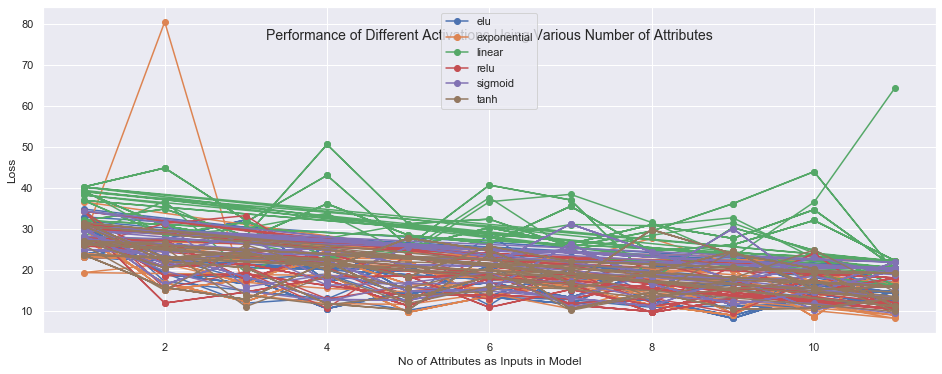

In [34]:
# Plot the actvations to see which performed best
plt.rcParams["figure.figsize"] = [16, 6]
groups = df.groupby(["activation"])

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for activation, group in groups:
    ax.plot(group["no_attrib"], group["loss"], marker='.', linestyle='-', ms=12, label=activation)
ax.legend()
ax.set_ylabel("Loss")
ax.set_xlabel("No of Attributes as Inputs in Model")
ax.text(.5,.9,"Performance of Different Activations Using Various Number of Attributes", horizontalalignment='center',transform=ax.transAxes,fontsize=14)

Text(0.5, 0.9, 'Performance of Different Optimiser Using Various Number of Attributes')

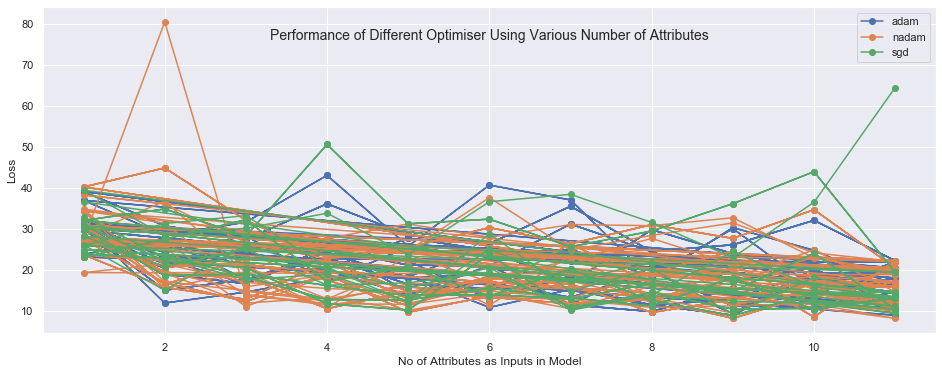

In [35]:
# Plot the actvations to see which performed best
plt.rcParams["figure.figsize"] = [16, 6]
groups = df.groupby('optimiser')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for optimiser, group in groups:
    ax.plot(group["no_attrib"], group["loss"], marker='.', linestyle='-', ms=12, label=optimiser)
ax.legend()
ax.set_ylabel("Loss")
ax.set_xlabel("No of Attributes as Inputs in Model")
ax.text(.5,.9,"Performance of Different Optimiser Using Various Number of Attributes", horizontalalignment='center',transform=ax.transAxes,fontsize=14)

In [36]:
# Sort the various model iterations according to loss to determine the best model(s) to chose) 
df.sort_values(by='loss', ascending=True)

,no_attrib,scaling,test_size,activation,optimiser,no_epochs,batch_size,loss
439,11,True,0.3,exponential,nadam,100,10,8.280677
580,9,True,0.3,elu,nadam,100,10,8.297373
514,9,True,0.3,elu,nadam,100,10,8.297373
712,9,True,0.3,elu,nadam,100,10,8.297373
570,10,True,0.3,exponential,nadam,100,10,8.620350
702,10,True,0.3,exponential,nadam,100,10,8.620350
504,10,True,0.3,exponential,nadam,100,10,8.620350
184,9,True,0.3,elu,sgd,100,10,8.959424
316,9,True,0.3,elu,sgd,100,10,8.959424
41,9,True,0.3,exponential,adam,100,10,9.063955
